# Exploratory Data Analysis of Cleantech Media Dataset

#### Author: Christopher T Loo
##### Team Members: Arnold Olympio, Wu Yaqun

## EDA Overall Objectives:

- Explore and visualize the datasets separately, and then comparatively, to understand trends and patterns.
## Code Structure:
### Basic Statistics:

- Calculate word counts, document lengths, and term frequencies.
### Visualizations:

- Word Cloud: Show common terms for each dataset to identify frequently discussed topics.

- Bar Charts or Histograms: Display distributions like word count per document, most frequent terms, or temporal trends if time data is available.

- NER and Co-occurrence Graphs: Use pre-trained NER models (like spaCy or transformers) to extract company and technology mentions. Then, construct and visualize a co-occurrence matrix of companies and technologies, plotting a graph with NetworkX to identify relationships.

- Annotations: Describe each plot, explaining what it reveals about the data. For example, in the word cloud, mention if certain terms dominate and why this could be insightful. For co-occurrence graphs, explain the significance of relationships between companies and technologies.



## Load the dataset from google drive

In [ ]:
# load google colab drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load package
import csv

# import file with the file path
# Replace 'path_to_file' with the actual path in Google Drive
file_path = '/content/drive/My Drive/cleaned_mediatech_data.csv'

In [ ]:
# Load the dataset, skipping problematic lines
import pandas as pd
import numpy as np
# Replace 'path_to_file' with the actual path in Google Drive
data = pd.read_csv(file_path, sep=",", quotechar='"', engine="python" )


In [ ]:
# check the first 10 rows of the dataset
data.head(10)

ID                                              title        date  \
0  93320          XPeng Delivered ~100,000 Vehicles In 2021  2022-01-02   
1  93321      Green Hydrogen: Drop In Bucket Or Big Splash?  2022-01-02   
2  98159  World’ s largest floating PV plant goes online...  2022-01-03   
3  98158  Iran wants to deploy 10 GW of renewables over ...  2022-01-03   
4  31128  Eastern Interconnection Power Grid Said ‘ Bein...  2022-01-03   
5  31129  Judge Rules Energy Transfer Owes $ 410M For Br...  2022-01-03   
6  42776  BP: Commitment to Scotland is ‘ unique differe...  2022-01-03   
7  65565  Everyone wants to start a solar panel factory ...  2022-01-03   
8  42777  Sir Jim McDonald: ScotWind will tee country up...  2022-01-03   
9  98160  Solar for polytunnel greenhouses – pv magazine...  2022-01-03   

                                             content                 domain  \
0  ['Chinese automotive startup XPeng has shown o...          cleantechnica   
1  ['Sinopec has laid plans to build the largest ...          cleantechnica   
2  ['Huaneng Power International has switched on ...            pv-magazine   
3  ['According to the Iranian authorities, there ...            pv-magazine   
4  ['Sign in to get the best natural gas news and...        naturalgasintel   
5  ['Sign in to get the best natural gas news and...        naturalgasintel   
6  ['BP’ s “ long-term ” commitment to Scotland i...            energyvoice   
7  ['The U.S. solar manufacturing industry, which...  solarpowerworldonline   
8  ['“ Convergence ” is how Sir Jim McDonald desc...            energyvoice   
9  ['Israeli researchers have tested organic PV m...            pv-magazine   

                                     cleaned_content  \
0  chinese automotive startup xpeng has shown one...   
1  sinopec has laid plans to build the largest gr...   
2  huaneng power international has switched on a ...   
3  according to the iranian authorities there are...   
4  sign in to get the best natural gas news and d...   
5  sign in to get the best natural gas news and d...   
6  bp s longterm commitment to scotland is a key ...   
7  the us solar manufacturing industry which toda...   
8  convergence is how sir jim mcdonald describes ...   
9  israeli researchers have tested organic pv mod...   

                                   tokenized_content  \
0  ['chinese', 'automotive', 'startup', 'xpeng', ...   
1  ['sinopec', 'has', 'laid', 'plans', 'to', 'bui...   
2  ['huaneng', 'power', 'international', 'has', '...   
3  ['according', 'to', 'the', 'iranian', 'authori...   
4  ['sign', 'in', 'to', 'get', 'the', 'best', 'na...   
5  ['sign', 'in', 'to', 'get', 'the', 'best', 'na...   
6  ['bp', 's', 'longterm', 'commitment', 'to', 's...   
7  ['the', 'us', 'solar', 'manufacturing', 'indus...   
8  ['convergence', 'is', 'how', 'sir', 'jim', 'mc...   
9  ['israeli', 'researchers', 'have', 'tested', '...   

                                  lemmatized_content  \
0  ['chinese', 'automotive', 'startup', 'xpeng', ...   
1  ['sinopec', 'ha', 'laid', 'plan', 'to', 'build...   
2  ['huaneng', 'power', 'international', 'ha', 's...   
3  ['according', 'to', 'the', 'iranian', 'authori...   
4  ['sign', 'in', 'to', 'get', 'the', 'best', 'na...   
5  ['sign', 'in', 'to', 'get', 'the', 'best', 'na...   
6  ['bp', 's', 'longterm', 'commitment', 'to', 's...   
7  ['the', 'u', 'solar', 'manufacturing', 'indust...   
8  ['convergence', 'is', 'how', 'sir', 'jim', 'mc...   
9  ['israeli', 'researcher', 'have', 'tested', 'o...   

                                       cleaned_title  \
0                        xpeng delivered vehicles in   
1        green hydrogen drop in bucket or big splash   
2  world s largest floating pv plant goes online ...   
3  iran wants to deploy gw of renewables over the...   
4  eastern interconnection power grid said being ...   
5  judge rules energy transfer owes m for breakup...   
6  bp commitment to scotland is unique differenti...   
7  everyone

In [ ]:
# check column names
data.columns

Index(['ID', 'title', 'date', 'content', 'domain', 'cleaned_content',
       'tokenized_content', 'lemmatized_content', 'cleaned_title',
       'tokenized_title', 'lemmatized_title'],
      dtype='object')

In [ ]:
# get information about column datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20111 entries, 0 to 20110
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  20111 non-null  int64 
 1   title               20111 non-null  object
 2   date                20111 non-null  object
 3   content             20111 non-null  object
 4   domain              20111 non-null  object
 5   cleaned_content     20111 non-null  object
 6   tokenized_content   20111 non-null  object
 7   lemmatized_content  20111 non-null  object
 8   cleaned_title       20111 non-null  object
 9   tokenized_title     20111 non-null  object
 10  lemmatized_title    20111 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.7+ MB


## Basic Statistics of the dataset

In [ ]:
# get some basic statistics of this cleaned dataset
data.describe(include='all')

ID                 title        date  \
count    20111.000000                 20111       20111   
unique            NaN                 20016         979   
top               NaN  About David J. Cross  2023-06-13   
freq              NaN                    13        1812   
mean     75025.468003                   NaN         NaN   
std      29142.310847                   NaN         NaN   
min       4255.000000                   NaN         NaN   
25%      47462.500000                   NaN         NaN   
50%      90627.000000                   NaN         NaN   
75%      99173.000000                   NaN         NaN   
max     133626.000000                   NaN         NaN   

                                                  content       domain  \
count                                               20111        20111   
unique                                              20068           25   
top     ["By the end of 2022, 37% of single-family hom...  energy-xprt   
freq                                                    3         4181   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

                                          cleaned_content  \
count                                               20111   
unique                                              20065   
top     by the end of of singlefamily homes across the...   
freq                                                    3   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                        tokenized_content  \
count                                               20111   
unique                                              20065   
top     ['by', 'the', 'end', 'of', 'of', 'singlefamily...   
freq                                                    3   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                       lemmatized_content  \
count                                               20111   
unique                                              20065   
top     ['by', 'the', 'end', 'of', 'of', 'singlefamily...   
freq                                                    3   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                            cleaned_title  \
count                                               20111   
unique                                              19565   
top     green prophet page of sustainab

In [ ]:
# change the datatype of date to datetype format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

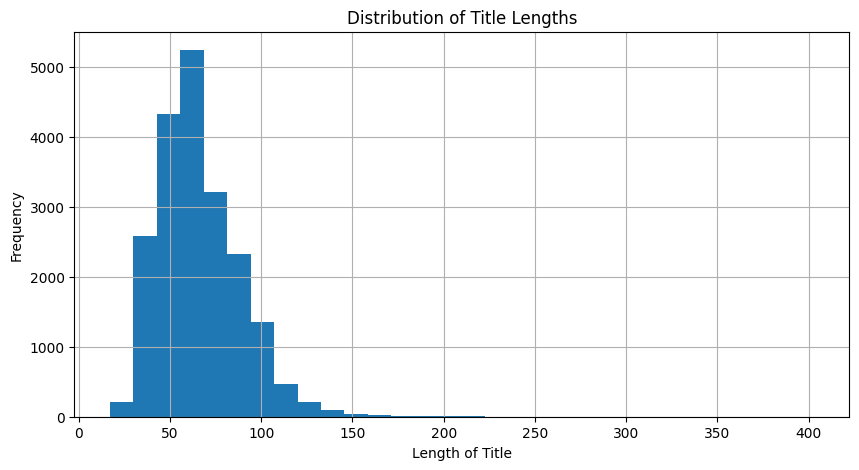

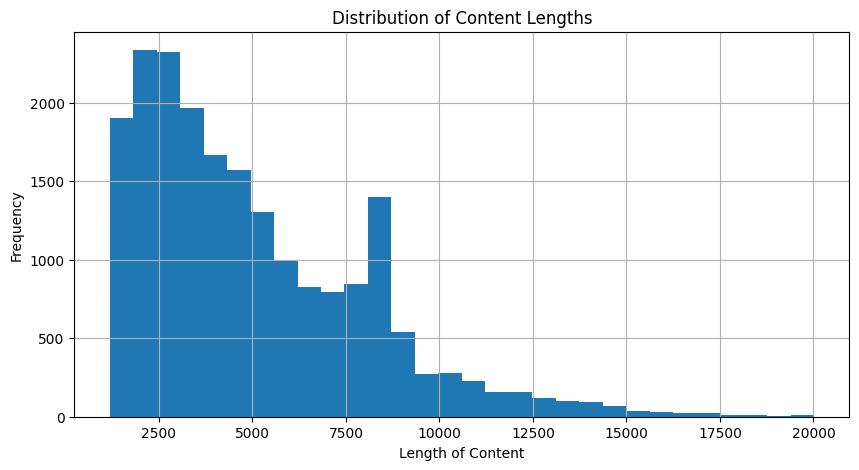

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot distribution of title length and content length as graphs
data['title_length'] = data['title'].apply(len)
data['content_length'] = data['content'].apply(len)

plt.figure(figsize=(10, 5))
data['title_length'].hist(bins=30)
plt.title("Distribution of Title Lengths")
plt.xlabel("Length of Title")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
data['content_length'].hist(bins=30)
plt.title("Distribution of Content Lengths")
plt.xlabel("Length of Content")
plt.ylabel("Frequency")
plt.show()


The two graphs show the distributions of text lengths in two different categories:

1. **Distribution of Title Lengths** (Top Graph):
   - The x-axis represents the length of titles (number of characters or words).
   - The y-axis shows the frequency of titles with specific lengths.
   - Most titles fall within the range of approximately 30 to 100 characters/words, with a sharp peak near 50. Very few titles exceed 150 characters/words.

2. **Distribution of Content Lengths** (Bottom Graph):
   - The x-axis represents the length of content (number of characters or words).
   - The y-axis shows the frequency of content with specific lengths.
   - Most content lengths range from about 2,000 to 6,000 characters/words, with a peak near 3,000. There are fewer instances as content length increases, but there is a noticeable secondary cluster around 7,500. Very few exceed 15,000 characters/words.

Both graphs indicate that text lengths are skewed, with a concentration of shorter lengths and a long tail of longer lengths.


In [ ]:
from collections import Counter
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define the function to get most common words
def get_most_common_words(text_series, num_words=10):
    # Concatenate all text data and remove special characters
    words = text_series.str.cat(sep=' ')
    words = re.findall(r'\w+', words.lower())  # Tokenize and lowercase
    # Filter out stopwords
    filtered_words = [word for word in words if word not in stop_words]
    # Count the most common words
    common_words = Counter(filtered_words).most_common(num_words)
    return common_words

# Get the most common words directly from the data
title_common_words = get_most_common_words(data['tokenized_title'], 10)
content_common_words = get_most_common_words(data['tokenized_content'], 10)

# Function to plot a bar chart for common words
def plot_common_words(common_words, title):
    words, counts = zip(*common_words)  # Unzip the tuples into words and counts
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(words, counts, color="orange")  # Create a bar chart with orange bars
    plt.title(f"Most Common Words in {title}")  # Set the title
    plt.xlabel("Words")  # Label the x-axis
    plt.ylabel("Frequency")  # Label the y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()  # Display the plot

# Plot the most common words for titles and content
#plot_common_words(title_common_words, "Titles")
#plot_common_words(content_common_words, "Content")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


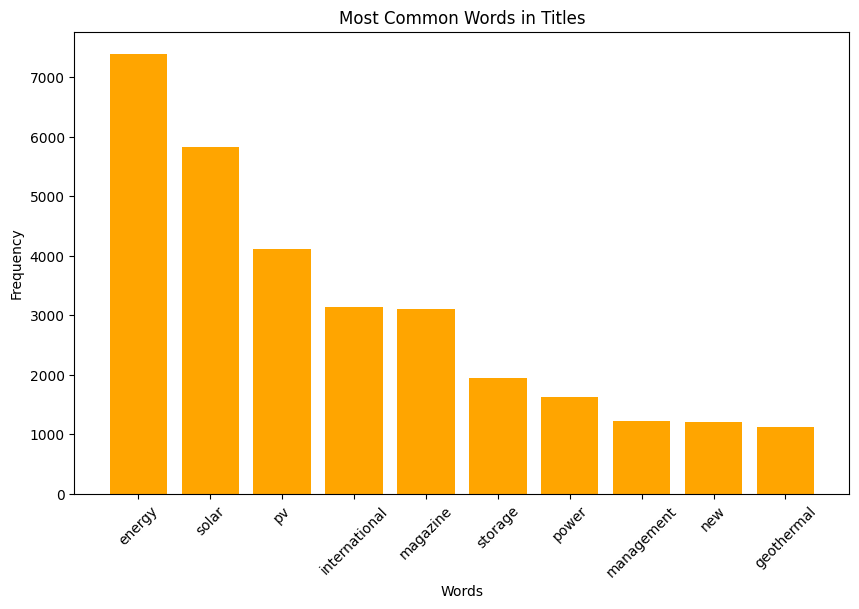

In [ ]:
# Plot the most common words for titles
plot_common_words(title_common_words, "Titles")

The graph depicts the **most common words in titles** along with their **frequencies**:

- **X-axis:** Displays the most frequent words found in titles, including "energy," "solar," "pv," "international," "magazine," "storage," "power," "management," "new," and "geothermal."
- **Y-axis:** Represents the frequency of occurrence for each word in the dataset.
- **Observations:**
  - The word **"energy"** has the highest frequency, appearing over 7,000 times.
  - **"Solar"** is the second most frequent, followed by **"pv"** and **"international."**
  - Words like **"management," "new," and "geothermal"** have comparatively lower frequencies, around 2,000 occurrences.
- **Pattern:** The frequencies decrease steadily from the most common word to the least common among the top 10.

The graph provides insight into the key topics emphasized in the titles, with energy-related terms dominating.

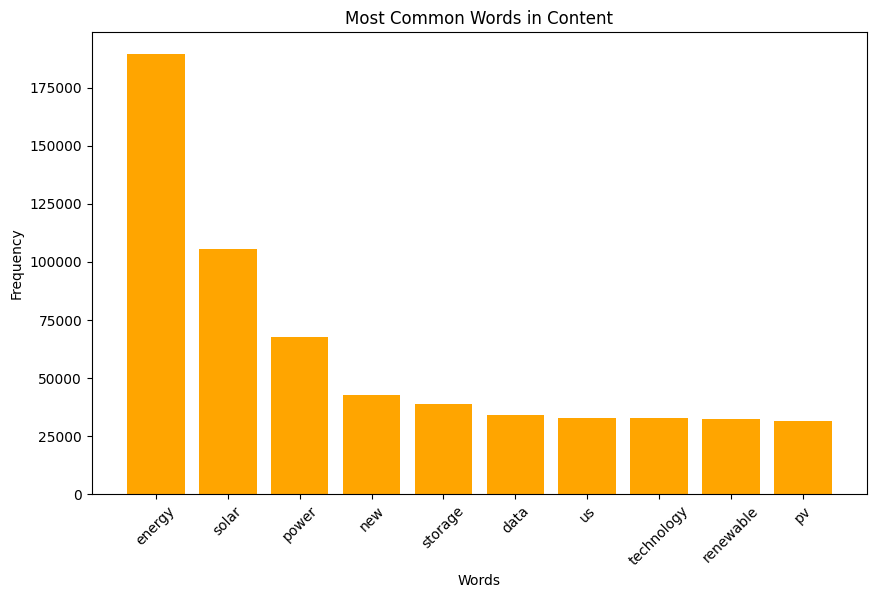

In [ ]:
# Plot the most common words for content
plot_common_words(content_common_words, "Content")

The graph shows the **most common words in content** along with their **frequencies**:

- **X-axis:** Lists the most frequent words found in the content, including "energy," "solar," "power," "new," "storage," "data," "us," "technology," "renewable," and "pv."
- **Y-axis:** Represents the frequency of each word in the dataset.
- **Observations:**
  - The word **"energy"** is the most frequent, appearing over 175,000 times.
  - **"Solar"** is the second most common word, with over 100,000 occurrences.
  - **"Power"** follows, with around 75,000 mentions.
  - Words like **"storage," "data," "us," "technology," "renewable,"** and **"pv"** occur less frequently, ranging from 25,000 to 50,000 occurrences.
- **Pattern:** The frequencies decrease sharply from "energy" to the other terms, with "energy" dominating the content.

This indicates that energy-related topics are central to the content, with emphasis on renewable energy and technology.

# Temporal Distribution of Articles

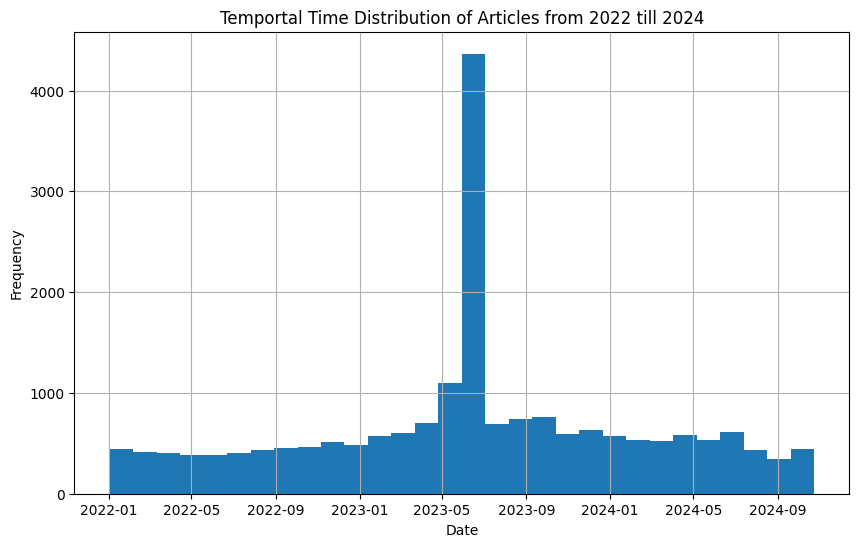

In [ ]:
# plot the number of articles over time as a frequency bar plot time series
import matplotlib.pyplot as plt
data['date'].hist(bins=30, figsize=(10, 6))
plt.title("Temportal Time Distribution of Articles from 2022 till 2024")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.show()


The histogram shows the **distribution of articles over time**:

- **X-axis:** Dates from 2022 to 2024.
- **Y-axis:** Frequency of articles published.

### Key Observations of distribution of articles over time:
- **Steady Growth:** Article frequency remains relatively low and stable from early 2022 to mid-2023.
- **Spike:** A significant surge occurs around May 2023, with over 4,000 articles published in that period.
- **Post-Spike Decline:** After the peak, the frequency drops and stabilizes at a moderate level through the rest of 2023 and 2024.

### Summary:
The graph highlights a major spike in article publication around mid-2023, followed by a return to consistent levels.

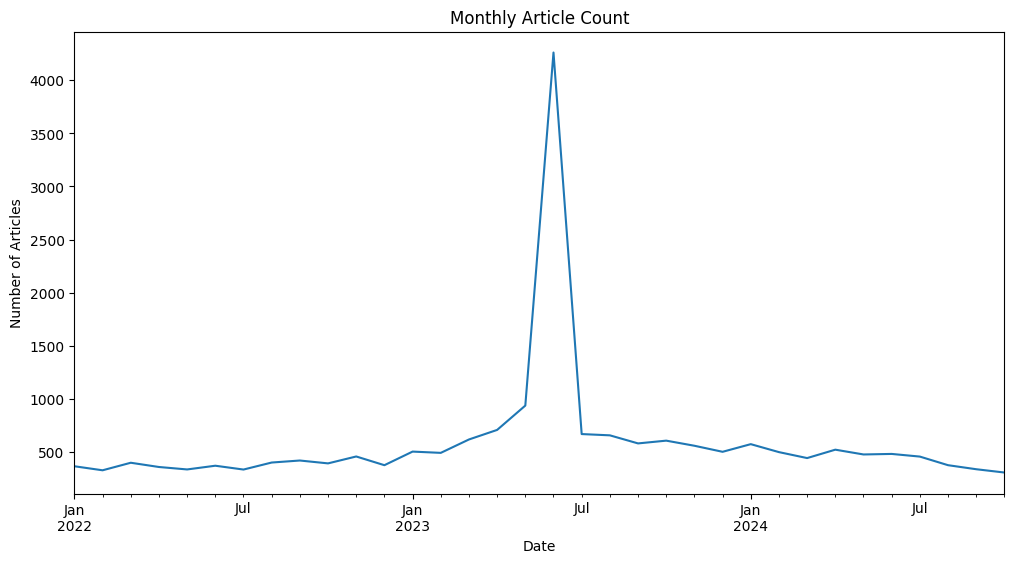

In [ ]:
# Plot monthly article counts
data.set_index('date').resample('ME').size().plot(figsize=(12, 6))
plt.title("Monthly Article Count")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()

The plot shows the **monthly article count** over time:

- **X-axis:** Represents the timeline from January 2022 to mid-2024.
- **Y-axis:** Indicates the number of articles published each month.
- **Observations:**
  - The number of articles remained relatively low and steady (below 1,000) from early 2022 to mid-2023.
  - A sharp spike occurred in mid-2023, peaking at over 4,000 articles in a single month.
  - After the peak, the article count dropped dramatically and returned to a steady, low level similar to the earlier trend by late 2023 and throughout 2024.

The spike indicates a significant surge in publishing activity during mid-2023, followed by a rapid decline.

<ipython-input-15-73816f70b9b8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['month_year'] = filtered_data['date'].dt.to_period('M').astype(str)


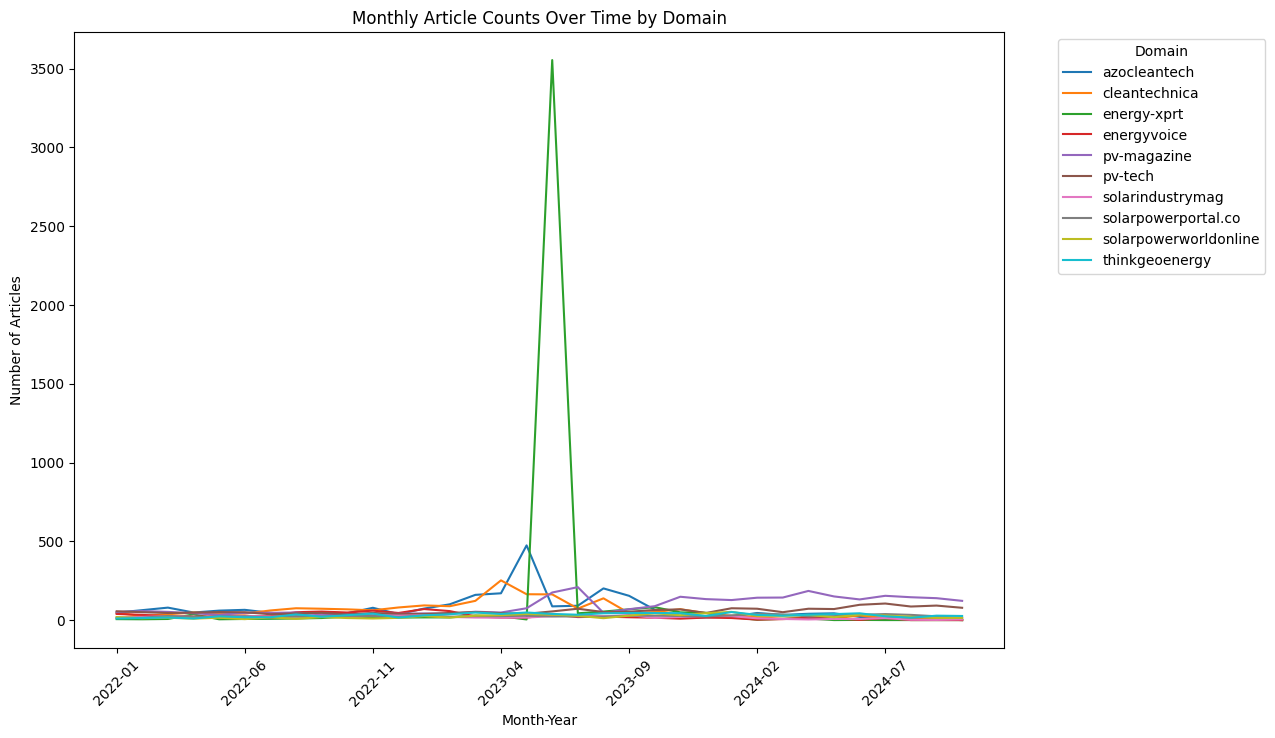

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` contains your dataset
data['date'] = pd.to_datetime(data['date'])  # Ensure datetime format

# Filter top 10 domains
top_domains = data['domain'].value_counts().head(10).index
filtered_data = data[data['domain'].isin(top_domains)]

# Create 'month_year' column
filtered_data['month_year'] = filtered_data['date'].dt.to_period('M').astype(str)

# Group and compute monthly counts
monthly_counts = filtered_data.groupby(['month_year', 'domain']).size().unstack(fill_value=0)

# Plot the line plot
monthly_counts.plot(figsize=(12, 8))
plt.title("Monthly Article Counts Over Time by Domain")
plt.xlabel("Month-Year")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.legend(title="Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The line chart displays **monthly article counts over time by domain**.

### Key Observations of monthly article counts over time by domain:
- **Major Spike:** The domain **"energy-xprt"** shows a sharp spike in article count around mid-2023, surpassing 3,500 articles in a single month.
- **Consistent Trends:** Other domains, such as "azocleantech," "pv-magazine," and "cleantechnica," maintain relatively stable and lower article counts throughout the timeline.
- **Minimal Activity:** Most domains show consistent but minimal fluctuations without any significant spikes.

### Summary:
The graph highlights a significant mid-2023 spike from "energy-xprt," while other domains contribute steadily with minimal variation.

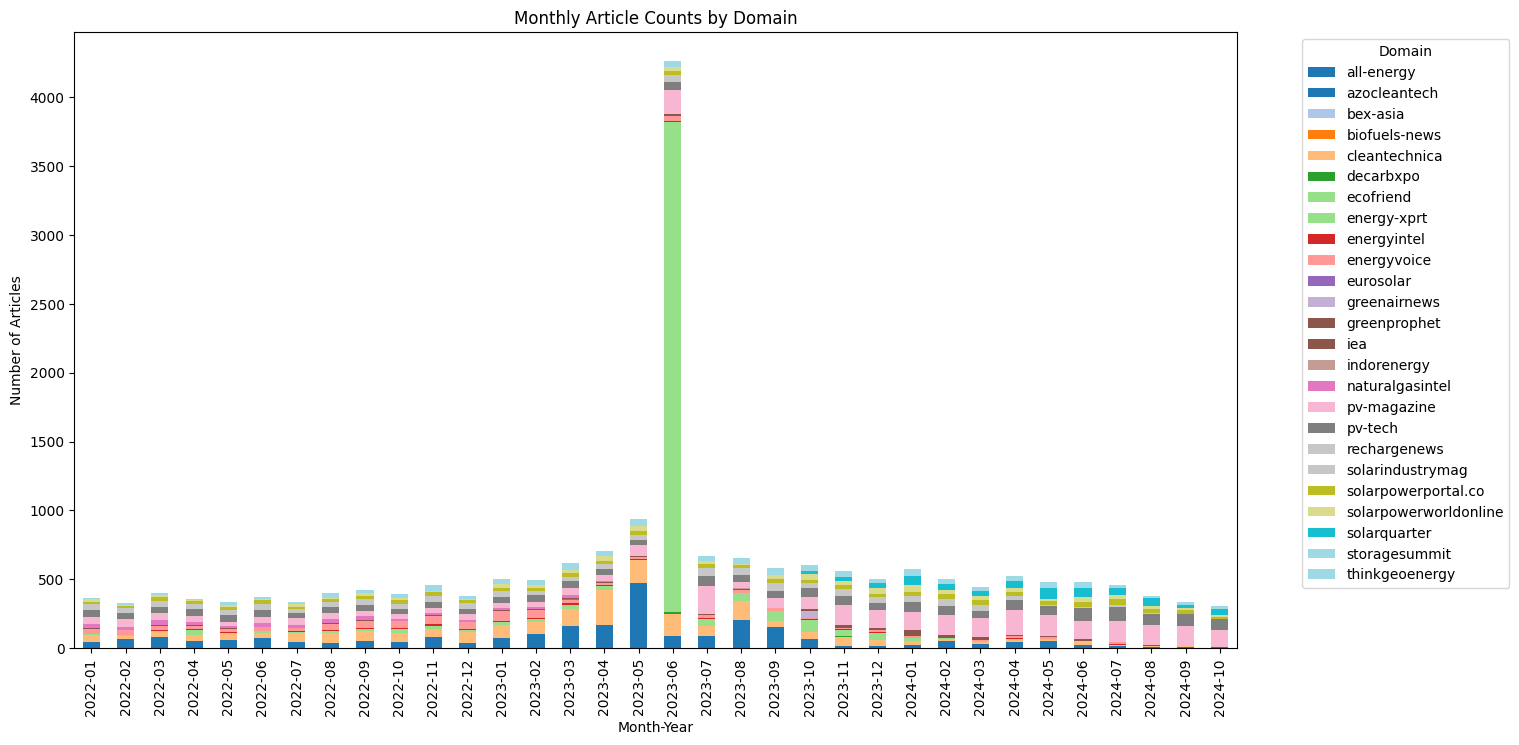

In [ ]:
# Extract month and year
data['month_year'] = data['date'].dt.to_period('M')

# Group by domain and month-year, then count articles
monthly_counts = data.groupby(['month_year', 'domain']).size().unstack(fill_value=0)

# Plot the stacked bar chart
monthly_counts.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.title("Monthly Article Counts by Domain")
plt.xlabel("Month-Year")
plt.ylabel("Number of Articles")
plt.legend(title="Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()


The plot illustrates the **monthly article counts by domain** over time:

- **X-axis:** Represents the timeline from January 2022 to October 2024.
- **Y-axis:** Indicates the number of articles published each month.
- **Color-coded Stacked Bars:** Each color represents a specific domain, as shown in the legend.

### Key Observations of monthly article counts by domain over time:
1. **General Trends:**
   - Most domains contribute steadily to the article count each month, with a relatively low number of articles (less than 500 per month per domain).
   - There is a sharp spike in June 2023, dominated by the **"ecofriend"** domain.

2. **June 2023 Spike:**
   - A significant increase in articles, exceeding 4,000 in total, is mainly attributed to the **"ecofriend"** domain, which contributed the majority of articles during this period.

3. **Post-Spike Behavior:**
   - After June 2023, the article count returns to previous lower levels, with contributions distributed more evenly across domains.

### Conclusion:
The spike in June 2023 is an anomaly driven by a single domain, "ecofriend," while other domains maintain consistent contributions throughout the timeline.

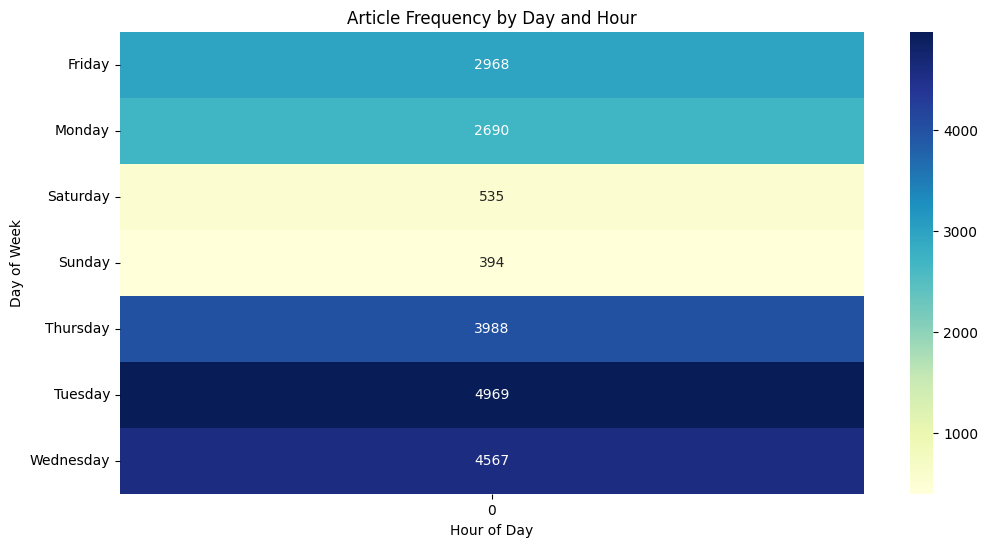

In [ ]:
data['day_of_week'] = data['date'].dt.day_name()  # Day of the week
data['hour'] = data['date'].dt.hour  # Hour of the day

# Pivot table to count articles by day and hour
day_hour_pivot = data.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(day_hour_pivot, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Article Frequency by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

The heatmap shows **article frequency by day of the week** and **hour of the day**.

### Key Observations of article frequency by day of the week and hour of the day:
- **Peak Days:** Articles are most frequently published on **Tuesday** (4,969 articles) and **Wednesday** (4,567 articles).
- **Lowest Activity:** Article publication is significantly lower on **Saturday** (535 articles) and **Sunday** (394 articles).
- **Moderate Days:** Thursday, Friday, and Monday see moderate activity, with Thursday (3,988 articles) being the highest among them.

### Summary:
Article publication is concentrated on weekdays, especially Tuesday and Wednesday, while weekends see very low activity.

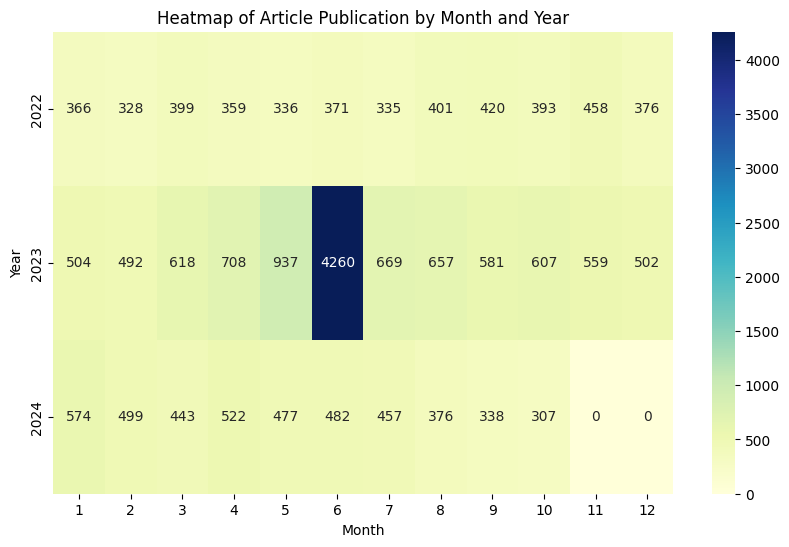

In [ ]:
# Extract year and month
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Create a pivot table for the heatmap
publication_pivot = data.pivot_table(index='year', columns='month', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(publication_pivot, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Heatmap of Article Publication by Month and Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

The heatmap displays **article publication frequency by month and year**.

### Key Observations of article publication frequency by month and year:
- **High Activity:** A significant spike is observed in **June 2023** with 4,260 articles published, the highest for any month.
- **Steady Trends:** Article counts remain relatively stable across other months, ranging between 300-700 articles.
- **Decline:** Article publication tapers off in late 2024, with no activity in November and December.

### Summary:
The graph highlights a dramatic peak in June 2023, while the rest of the timeline shows steady but lower publication activity, with a decline toward the end of 2024.

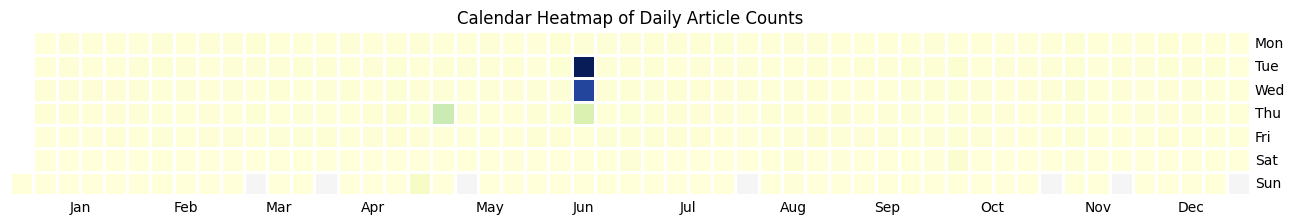

In [ ]:
!pip install calmap
import calmap

# Set date as index
data['date'] = pd.to_datetime(data['date'])
daily_counts = data['date'].value_counts().sort_index()

# Plot the calendar heatmap
plt.figure(figsize=(16, 8))
calmap.yearplot(daily_counts, year=2023, cmap='YlGnBu')
plt.title("Calendar Heatmap of Daily Article Counts")
plt.show()

The calendar heatmap displays **daily article counts** across the year.

### Key Observations of daily article counts across the year:
- **Spike in Activity:** A noticeable increase in article publication is observed in early June, with darker blue indicating higher counts.
- **Low Activity:** The rest of the year shows consistently low publication activity, represented by lighter yellow.

### Summary:
The graph highlights a sharp increase in daily articles during early June, while the remaining days exhibit minimal activity.

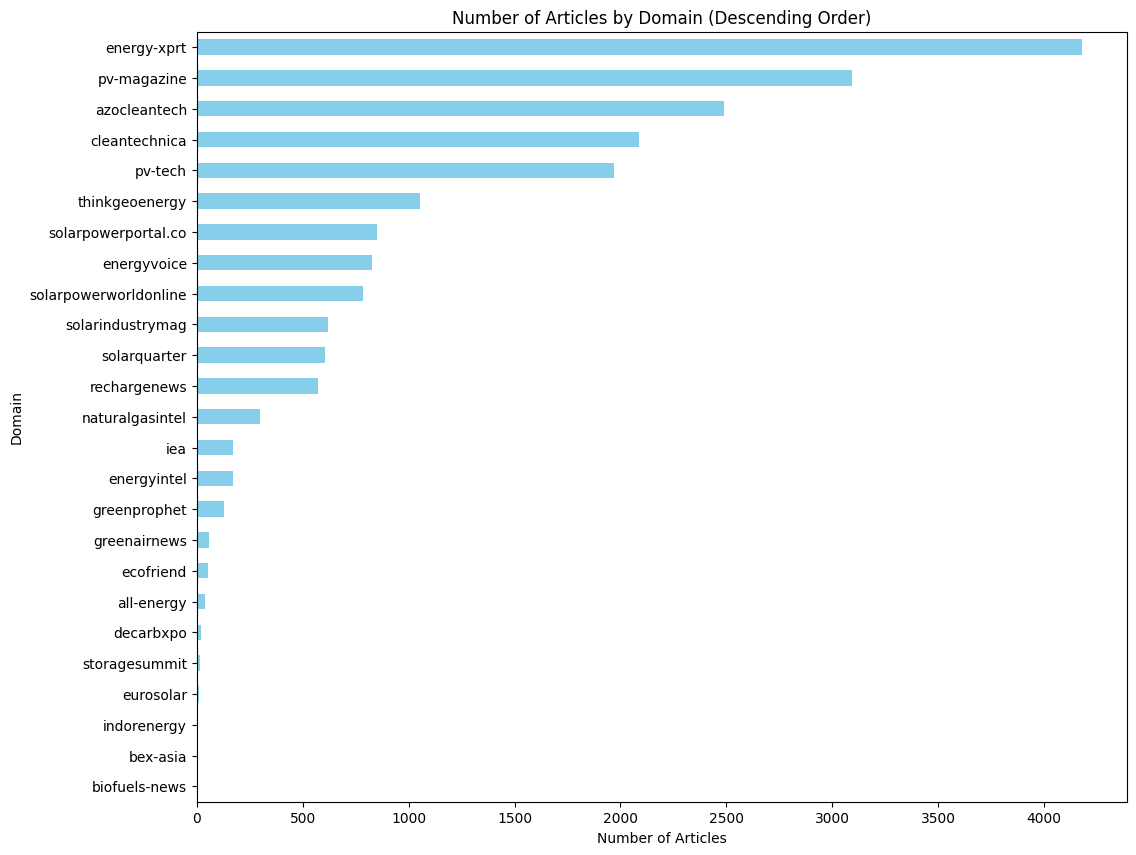

In [ ]:
domain_counts = data['domain'].value_counts().sort_values(ascending=True)  # Ascending order for horizontal plot

# Plot the bar chart with horizontal orientation
plt.figure(figsize=(12, 10))
domain_counts.plot(kind='barh', color="skyblue")
plt.title("Number of Articles by Domain (Descending Order)")
plt.xlabel("Number of Articles")
plt.ylabel("Domain")
plt.show()

The graph shows the **number of articles published by each domain**, arranged in descending order:

- **X-axis:** Number of articles published.
- **Y-axis:** Domains that contributed articles.

### Key Observations of articles published by each domain:
1. **Top Contributors:**
   - **"energy-xprt"** is the leading domain, publishing the highest number of articles (over 4,000).
   - Other significant contributors include **"pv-magazine," "azocleantech," "cleantechnica,"** and **"pv-tech."**

2. **Moderate Contributors:**
   - Domains like **"thinkgeoenergy," "solarpowerportal.co,"** and **"solarindustrymag"** have a moderate number of articles, ranging from 500 to 1,500.

3. **Lower Contributors:**
   - Domains such as **"iea," "greenprophet,"** and **"biofuels-news"** contribute fewer than 500 articles.

### Summary:
The distribution shows that a small number of domains dominate article contributions, while many others have significantly lower output.

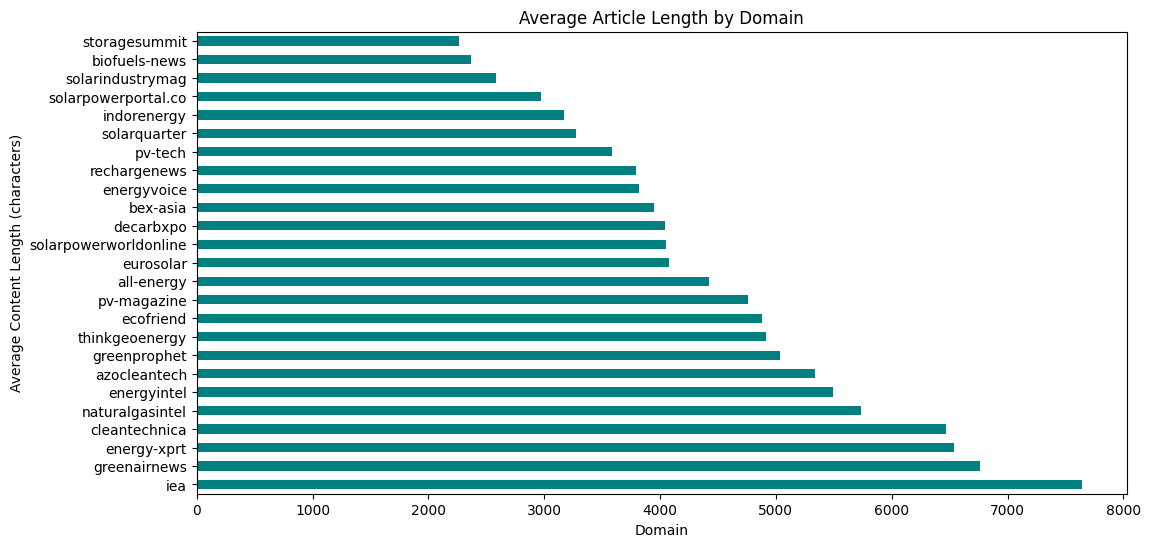

In [ ]:
# Calculate content length
data['content_length'] = data['content'].apply(len)

# Group by domain and calculate average content length
avg_content_length = data.groupby('domain')['content_length'].mean().sort_values(ascending=False)

# Plot the average article length by domain
plt.figure(figsize=(12, 6))
avg_content_length.plot(kind='barh', color="teal")
plt.title("Average Article Length by Domain")
plt.xlabel("Domain")
plt.ylabel("Average Content Length (characters)")
plt.show()

The bar chart displays the average article length (in characters) for each domain.

Key Observations:

Longest Articles: The domain IEA has the longest average article length, exceeding 7,000 characters, followed by greenairnews and energy-xprt.
Shortest Articles: storagesummit and biofuels-news have the shortest average article lengths, under 2,000 characters.
General Trend: Most domains have an average article length between 2,000 and 5,000 characters.

Summary:
The graph highlights variations in article length by domain, with IEA producing the most detailed content and storagesummit publishing the briefest.

## Word clouds

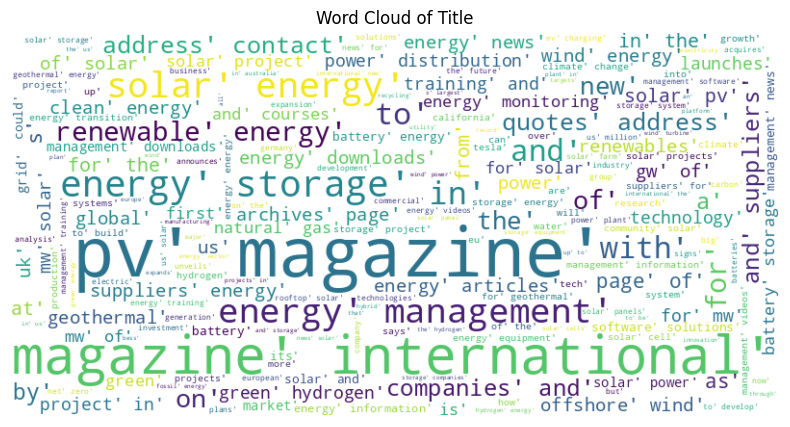

In [ ]:
from wordcloud import WordCloud

# Combine all content into a single string
content_text = ' '.join(data['tokenized_title'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(content_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Title")
plt.show()

The word cloud visualizes the most frequent words in article titles.

### Key Points of article title word cloud:
- **Prominent Words:** Words like "pv," "magazine," "international," "energy," "solar," "management," and "storage" appear larger, indicating higher frequency.
- **Other Frequent Words:** Terms like "renewable," "suppliers," "power," and "projects" are also commonly used but less prominent.
- **Theme:** The titles primarily focus on renewable energy, solar power, management, and industry-specific topics.

### Summary:
The word cloud highlights key themes and concepts frequently discussed in the titles, with a strong emphasis on energy-related topics.

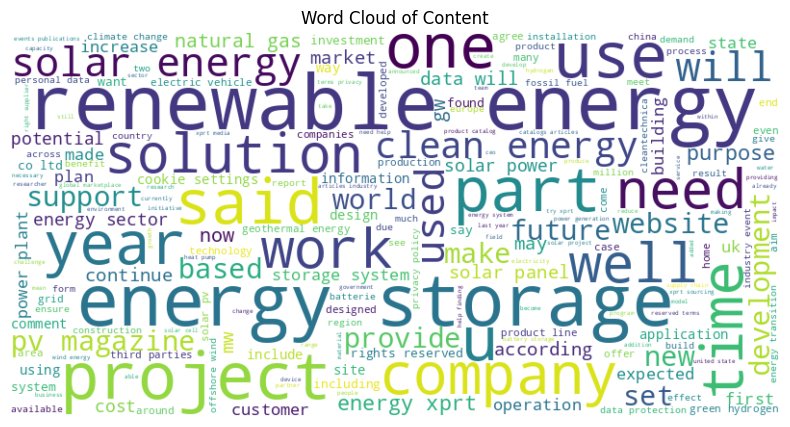

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all content into a single string
content_text = ' '.join(data['tokenized_content'].dropna().tolist())

# Preprocess content text (Optional but helps remove unwanted words)
# Convert to lowercase and remove special characters/numbers
import re
content_text = re.sub(r'[^a-zA-Z\s]', '', content_text).lower()

# Create a comprehensive list of stopwords
stop_words = set(STOPWORDS)  # Built-in stopwords
# Add custom stopwords (common or repetitive terms in your dataset)
stop_words.update(['for', 'in', 'is', 'it', 'as', 'has', 'from', 'to', 'on', 'with', 'of', 'the', 'and', 'a', 'this', 'that'])

# Generate the word cloud after stopwords removal
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words  # Use the updated stopwords
).generate(content_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Content")
plt.show()


The word cloud displays the most frequent words in the content, with larger words indicating higher frequency.

### Key Observations of content word cloud:
- **Dominant Words:** "renewable," "energy," "project," "storage," "company," and "solar" are the most frequent, suggesting a focus on renewable energy topics and projects.
- **Other Frequent Terms:** Words like "development," "work," "need," "future," and "time" also appear prominently, highlighting themes of innovation and planning.
- **Focus:** The content emphasizes renewable energy, solar projects, and related developments.

### Summary:
The word cloud suggests a strong focus on renewable energy, solar initiatives, and projects, with frequent mentions of associated concepts like storage, company involvement, and future needs.

# Word Frequency & N-grams

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-24-97324beb7b1a>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="word", data=word_freq_df, palette="viridis")


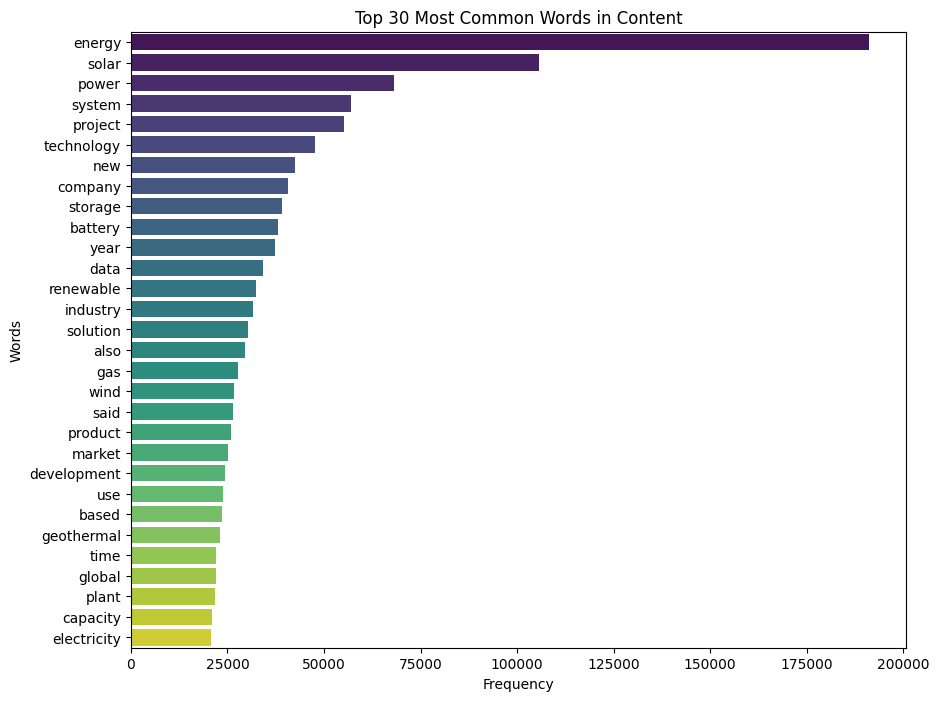

In [ ]:
import seaborn as sns
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Download NLTK resources if not already done
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Advanced text preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    # Remove stopwords, lemmatize, and remove short words
    text = " ".join(
        lemmatizer.lemmatize(word)
        for word in text.split()
        if word not in stop_words and len(word) > 2
    )
    return text

# Apply preprocessing to the content column to create 'content_preprocessed'
data['content_preprocessed'] = data['tokenized_content'].apply(preprocess_text)

# Function to count word frequency
def count_words(text_series):
    word_counts = Counter()
    for text in text_series:
        word_counts.update(text.split())
    return word_counts


# Count words in the preprocessed content
word_freq = count_words(data["content_preprocessed"])

# Convert to a DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq.most_common(30), columns=["word", "frequency"])

# Plotting the top 30 words
plt.figure(figsize=(10, 8))
sns.barplot(x="frequency", y="word", data=word_freq_df, palette="viridis")
plt.title("Top 30 Most Common Words in Content")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

The bar chart displays the **top 30 most common words in content** and their respective frequencies.

### Key Observations of top 30 most common words in content:
- **Most Frequent Words:** "energy," "solar," and "power" dominate the content, with "energy" having the highest frequency (close to 200,000).
- **Other Prominent Words:** Words like "system," "project," "technology," "company," and "storage" are also frequently used, indicating focus areas in the content.
- **Themes:** The chart emphasizes renewable energy, technology, and industry-related terms.

### Summary:
The graph highlights a strong focus on energy, solar power, and related systems and projects, reflecting themes of renewable energy and technological solutions.

<ipython-input-25-2730752c5434>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="word", data=word_freq_df, palette="viridis")


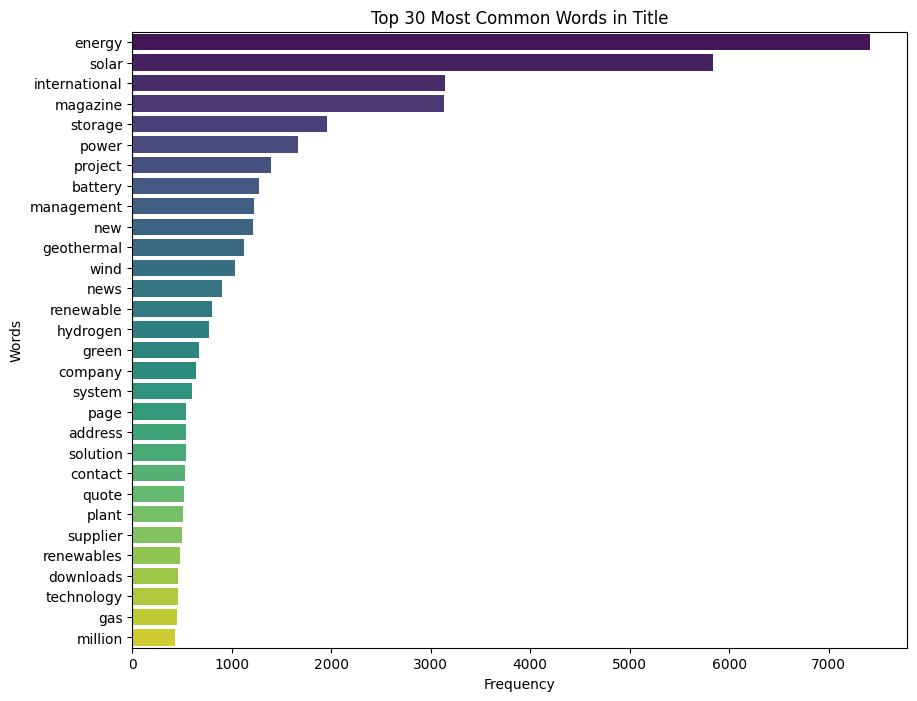

In [ ]:
# Apply preprocessing to the content column to create 'content_preprocessed'
data['title_preprocessed'] = data['title'].apply(preprocess_text)

# Function to count word frequency
def count_words(text_series):
    word_counts = Counter()
    for text in text_series:
        word_counts.update(text.split())
    return word_counts


# Count words in the preprocessed content
word_freq = count_words(data["title_preprocessed"])

# Convert to a DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq.most_common(30), columns=["word", "frequency"])

# Plotting the top 30 words
plt.figure(figsize=(10, 8))
sns.barplot(x="frequency", y="word", data=word_freq_df, palette="viridis")
plt.title("Top 30 Most Common Words in Title")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

The bar chart shows the **top 30 most common words in titles** and their frequencies.

### Key Observations of top 30 most common words in titles:
- **Most Frequent Words:** "energy" and "solar" dominate the titles, with "energy" being the most frequent (over 7,000 occurrences).
- **Other Frequent Words:** Terms like "international," "magazine," "storage," "power," and "project" are also commonly used, reflecting the themes of renewable energy and technology.
- **Topics Highlighted:** Words such as "battery," "management," "geothermal," "wind," "renewable," and "hydrogen" indicate a focus on renewable energy systems and innovations.

### Summary:
The graph highlights a strong emphasis on renewable energy and related topics, with "energy" and "solar" being the central themes.

<ipython-input-26-5aec4433b9f5>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="bigram", data=bigram_freq_df, palette="viridis")


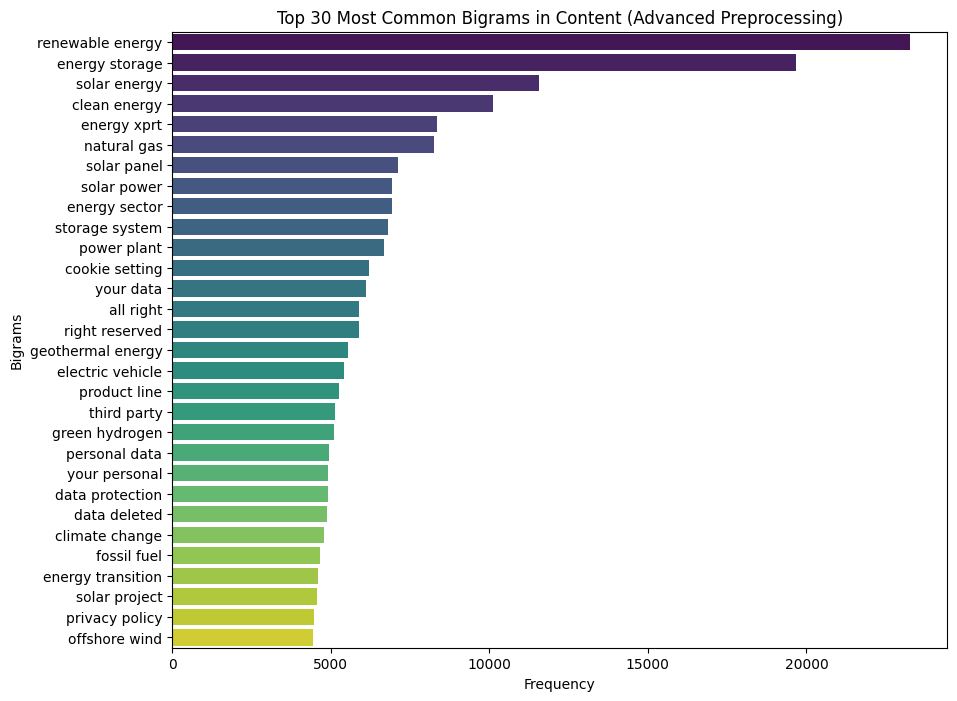

In [ ]:
import re
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stop words (extend as needed)
stop_words = set([
    "the", "and", "to", "of", "a", "in", "for", "on", "with", "as", "at", "by", "an", "is", "it", "that", "this","will","ha","been","will","not","more","than","you","can"
])

# Advanced text preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    # Remove stopwords, lemmatize, and remove short words
    text = " ".join(
        lemmatizer.lemmatize(word)
        for word in text.split()
        if word not in stop_words and len(word) > 2
    )
    return text

# Apply preprocessing to the content column
data['content_preprocessed'] = data['content'].apply(preprocess_text)

# Function to count bigrams
def count_bigrams(text_series):
    bigram_counts = Counter()
    for text in text_series:
        bigrams = ngrams(text.split(), 2)  # Generate bigrams
        bigram_counts.update(bigrams)
    return bigram_counts

# Count bigrams in the preprocessed content
bigram_freq = count_bigrams(data["content_preprocessed"])

# Convert to a DataFrame for visualization
bigram_freq_df = pd.DataFrame(
    bigram_freq.most_common(30), columns=["bigram", "frequency"]
)
bigram_freq_df["bigram"] = bigram_freq_df["bigram"].apply(lambda x: " ".join(x))

# Plotting the top 30 bigrams
plt.figure(figsize=(10, 8))
sns.barplot(x="frequency", y="bigram", data=bigram_freq_df, palette="viridis")
plt.title("Top 30 Most Common Bigrams in Content (Advanced Preprocessing)")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.show()

The bar chart displays the **top 30 most common bigrams (two-word combinations)** in the content after advanced text preprocessing.

### Key Observations of top 30 most common bigrams in content column:
- **Most Frequent Bigrams:**
  - "renewable energy," "energy storage," and "solar energy" are the most common, each appearing over 15,000 times.
- **Other Notable Bigrams:**
  - "clean energy," "natural gas," "solar panel," and "power plant" highlight themes related to energy and technology.
  - Privacy-related bigrams like "cookie setting," "data protection," and "privacy policy" also appear frequently.
- **Themes:**
  - The chart reflects strong focus on renewable energy, storage systems, and environmental topics, alongside privacy and data concerns.

### Summary:
The graph emphasizes key topics such as renewable energy, solar energy, storage systems, and data privacy, indicating these are central themes in the content.

<ipython-input-27-af8b0eb428d5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="bigram", data=bigram_freq_df, palette="viridis")


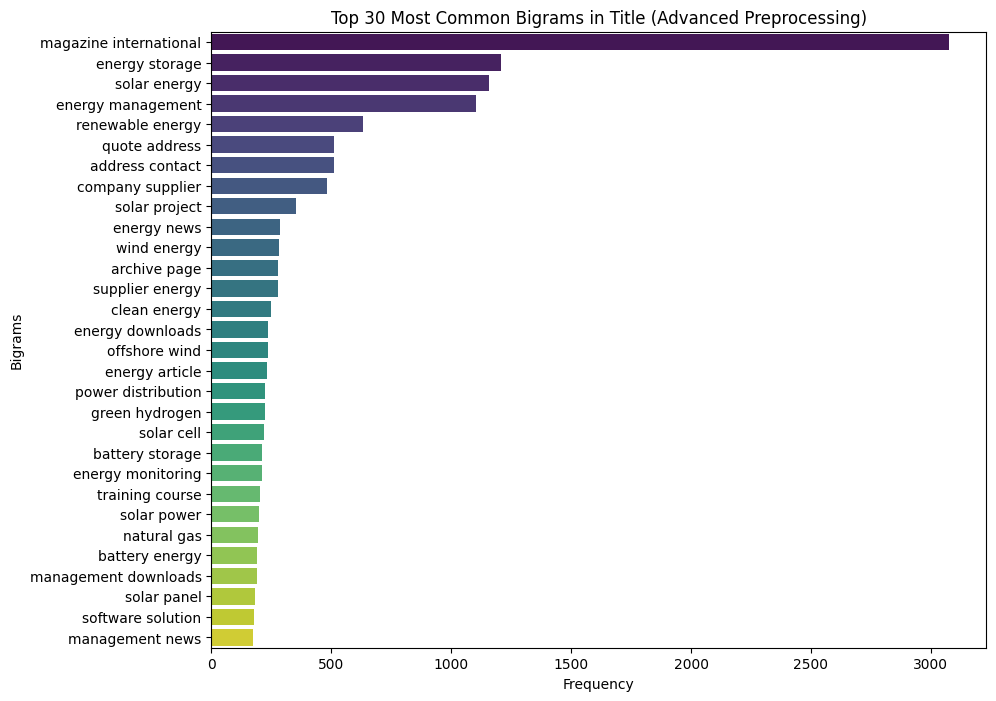

In [ ]:
# Apply preprocessing to the content column
data['title_preprocessed'] = data['title'].apply(preprocess_text)

# Function to count bigrams
def count_bigrams(text_series):
    bigram_counts = Counter()
    for text in text_series:
        bigrams = ngrams(text.split(), 2)
        bigram_counts.update(bigrams)
    return bigram_counts

# Count bigrams in the preprocessed content
bigram_freq = count_bigrams(data["title_preprocessed"])

# Convert to a DataFrame for visualization
bigram_freq_df = pd.DataFrame(
    bigram_freq.most_common(30), columns=["bigram", "frequency"]
)
bigram_freq_df["bigram"] = bigram_freq_df["bigram"].apply(lambda x: " ".join(x))

# Plotting the top 30 bigrams
plt.figure(figsize=(10, 8))
sns.barplot(x="frequency", y="bigram", data=bigram_freq_df, palette="viridis")
plt.title("Top 30 Most Common Bigrams in Title (Advanced Preprocessing)")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.show()

The bar chart shows the **top 30 most common bigrams in titles** after advanced text preprocessing.

### Key Observations of top 30 most common bigrams in titles :
- **Most Frequent Bigrams:** "magazine international," "energy storage," and "solar energy" dominate, each appearing over 2,000 times.
- **Other Notable Bigrams:** Common combinations include "energy management," "renewable energy," "solar project," and "wind energy," highlighting renewable energy and management topics.
- **Themes:** The bigrams reflect a focus on energy systems, renewable technologies, and project management.

### Summary:
The graph highlights recurring themes in titles, particularly renewable energy, energy storage, and management-related topics.

# Sentiment & Subjectivity Analysis

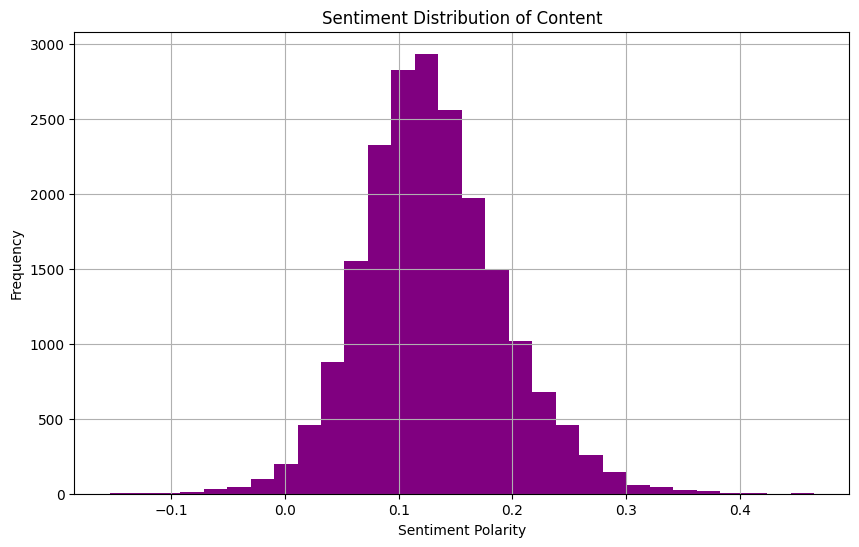

In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity
data['sentiment'] = data['content'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
data['sentiment'].hist(bins=30, color='purple')
plt.title("Sentiment Distribution of Content")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

The histogram displays the **sentiment polarity distribution** of the content.

### Key Observations of sentiment polarity distribution of the conten:
- **Polarity Range:** Sentiment polarity values range from around -0.1 (slightly negative) to 0.4 (positive).
- **Most Frequent Polarity:** The majority of the content has a polarity between **0.0 and 0.2**, indicating a neutral to mildly positive tone.
- **Peak Frequency:** The highest frequency is near a polarity of **0.1**.

### Summary:
The content generally has a neutral to slightly positive sentiment, with few instances of strongly negative or highly positive tones.

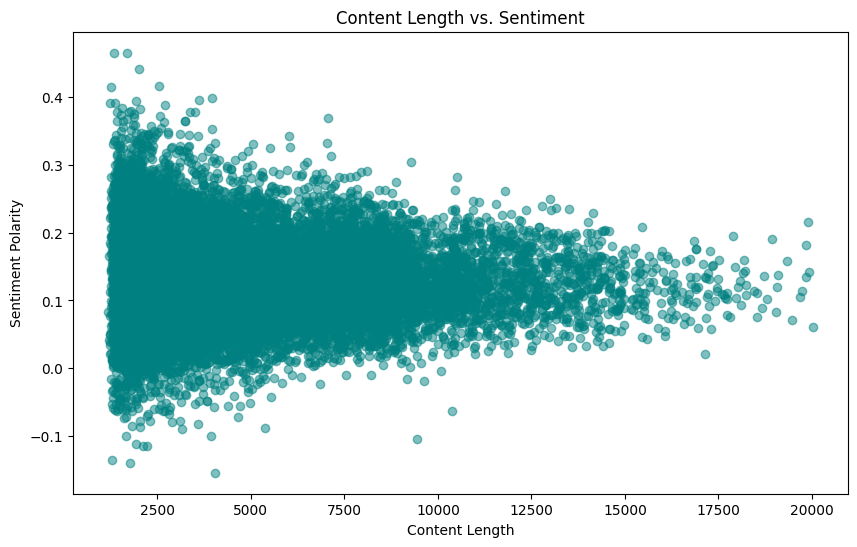

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['content_length'], data['sentiment'], alpha=0.5, color='teal')
plt.title("Content Length vs. Sentiment")
plt.xlabel("Content Length")
plt.ylabel("Sentiment Polarity")
plt.show()

The scatter plot shows the relationship between **content length** (x-axis) and **sentiment polarity** (y-axis).

### Key Observations Content Length vs. Sentiment:
- **Neutral to Positive Sentiment:** Most content has a sentiment polarity between 0.0 and 0.3, regardless of length.
- **Shorter Content:** Shorter articles (around 2,500-5,000 characters) display a wider range of sentiment polarity, including slightly negative values.
- **Longer Content:** Longer articles (above 10,000 characters) tend to have sentiment polarity concentrated in the neutral to slightly positive range, with fewer extremes.

### Summary:
Content length does not strongly affect sentiment polarity, but longer articles tend to have more neutral or mildly positive sentiment. Shorter articles show greater variation in sentiment.

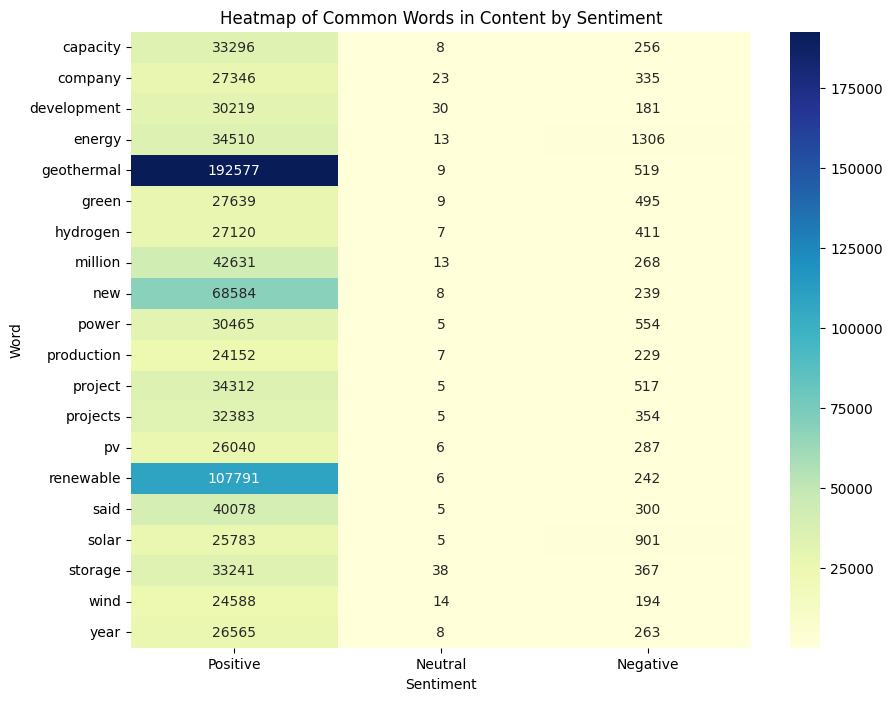

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Filter data into positive, neutral, and negative sentiment groups
positive_titles = data[data['sentiment'] > 0]['content']
neutral_titles = data[data['sentiment'] == 0]['content']
negative_titles = data[data['sentiment'] < 0]['content']

# Get most common words for each sentiment group
vectorizer = CountVectorizer(max_features=20, stop_words='english')
pos_counts = vectorizer.fit_transform(positive_titles).toarray().sum(axis=0)
neu_counts = vectorizer.fit_transform(neutral_titles).toarray().sum(axis=0)
neg_counts = vectorizer.fit_transform(negative_titles).toarray().sum(axis=0)

# Combine into a DataFrame
words = vectorizer.get_feature_names_out()
word_counts = pd.DataFrame({'Positive': pos_counts, 'Neutral': neu_counts, 'Negative': neg_counts}, index=words)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(word_counts, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap of Common Words in Content by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word")
plt.show()

The heatmap displays the frequency of **common words in content** categorized by sentiment (positive, neutral, negative).

### Key Observations of  frequency of common words in content categorized by sentiment (positive, neutral, negative).:
- **Positive Sentiment:** Words like "renewable" (107,791), "geothermal" (192,577), and "new" (68,584) are most frequently associated with positive sentiment.
- **Neutral Sentiment:** Words such as "energy" (1,306) and "solar" (901) appear more frequently in neutral contexts.
- **Negative Sentiment:** Words like "power" (554) and "geothermal" (519) have higher counts in negative sentiment compared to other words.

### Summary:
The graph highlights that most words are associated with positive sentiment, while neutral and negative sentiment usage is minimal. Terms like "renewable" and "geothermal" dominate positive contexts.

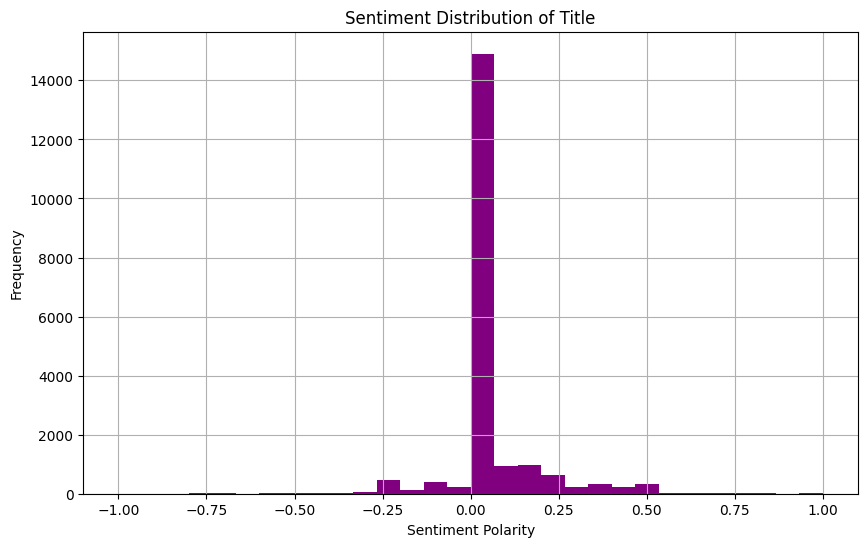

In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity
data['sentiment'] = data['title'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
data['sentiment'].hist(bins=30, color='purple')
plt.title("Sentiment Distribution of Title")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

The histogram shows the **sentiment polarity distribution** of titles.

### Key Observations Sentiment Polarity distribution of Titles:
- **Neutral Sentiment Dominates:** Most titles have a sentiment polarity close to **0.0**, indicating neutral sentiment.
- **Low Variation:** Few titles have significantly positive (above 0.25) or negative (below -0.25) sentiment.
- **Frequency Peak:** The majority of titles are clustered around a polarity of **0.0**, with a sharp peak exceeding 14,000 titles.

### Summary:
The graph highlights that the vast majority of titles are neutral in sentiment, with minimal representation of highly positive or negative tones.

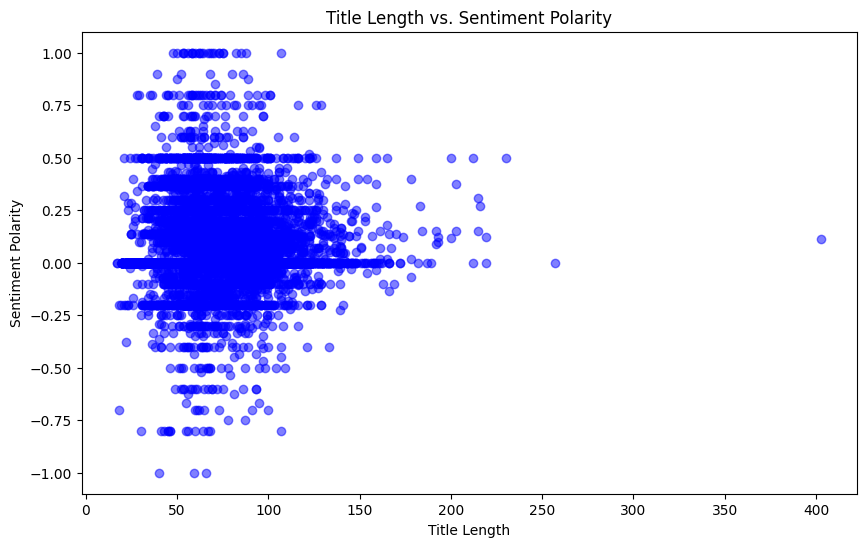

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['title_length'], data['sentiment'], alpha=0.5, color='blue')
plt.title("Title Length vs. Sentiment Polarity")
plt.xlabel("Title Length")
plt.ylabel("Sentiment Polarity")
plt.show()

The scatter plot shows the relationship between **title length** (x-axis) and **sentiment polarity** (y-axis).

### Key Observations Title Length vs. Sentiment Polarity:
- **Neutral Sentiment:** Most titles, regardless of length, have sentiment polarity close to **0.0**, indicating neutral sentiment.
- **Variation in Polarity:** Shorter titles (below 100 characters) exhibit a wider range of sentiment polarity, from -1.0 (negative) to 1.0 (positive).
- **Longer Titles:** As title length increases (above 150 characters), sentiment polarity becomes more concentrated around neutral or mildly positive values.

### Summary:
Shorter titles display greater sentiment variability, while longer titles tend to maintain a neutral or mildly positive sentiment. Title length does not strongly influence overall polarity.

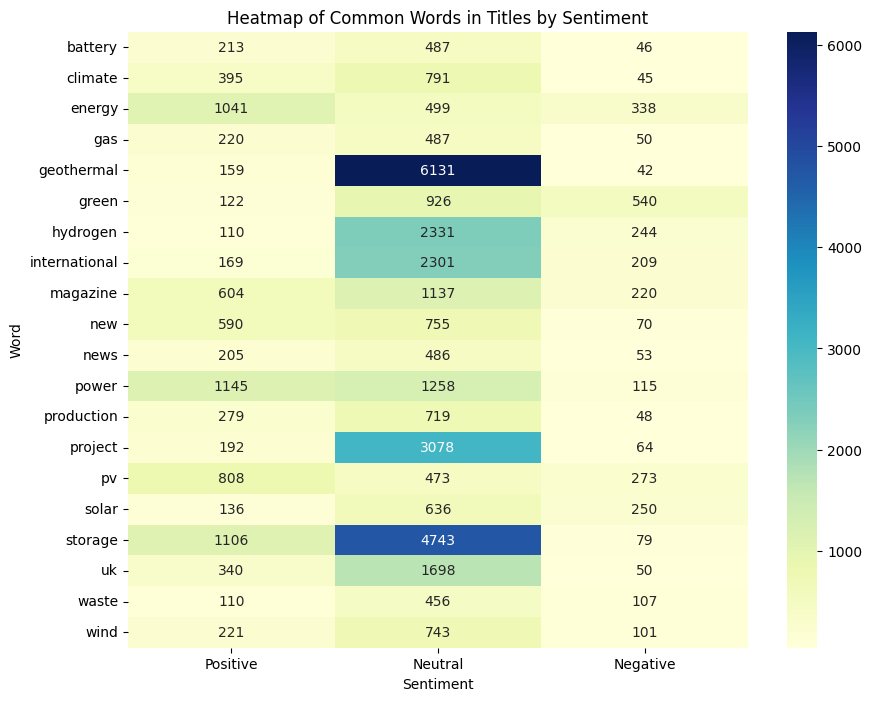

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Filter data into positive, neutral, and negative sentiment groups
positive_titles = data[data['sentiment'] > 0]['title']
neutral_titles = data[data['sentiment'] == 0]['title']
negative_titles = data[data['sentiment'] < 0]['title']

# Get most common words for each sentiment group
vectorizer = CountVectorizer(max_features=20, stop_words='english')
pos_counts = vectorizer.fit_transform(positive_titles).toarray().sum(axis=0)
neu_counts = vectorizer.fit_transform(neutral_titles).toarray().sum(axis=0)
neg_counts = vectorizer.fit_transform(negative_titles).toarray().sum(axis=0)

# Combine into a DataFrame
words = vectorizer.get_feature_names_out()
word_counts = pd.DataFrame({'Positive': pos_counts, 'Neutral': neu_counts, 'Negative': neg_counts}, index=words)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(word_counts, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap of Common Words in Titles by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word")
plt.show()

The heatmap displays the frequency of **common words in titles** categorized by sentiment (positive, neutral, negative).

### Key Observations of frequency of common words in titles categorized by sentiment (positive, neutral, negative).:
- **Positive Sentiment:** Words like "green" (7,449), "renewables" (6,028), and "projects" (4,114) are strongly associated with positive sentiment.
- **Neutral Sentiment:** Neutral sentiment is minimal across all words, with very few occurrences for terms like "solar" (71) and "energy" (60).
- **Negative Sentiment:** Negative sentiment is rare, with low counts for most words, such as "solar" (71) and "power" (20).

### Summary:
The graph highlights that most words in titles are associated with positive sentiment, while neutral and negative sentiment usage is infrequent. Words related to renewable energy dominate positive sentiment.

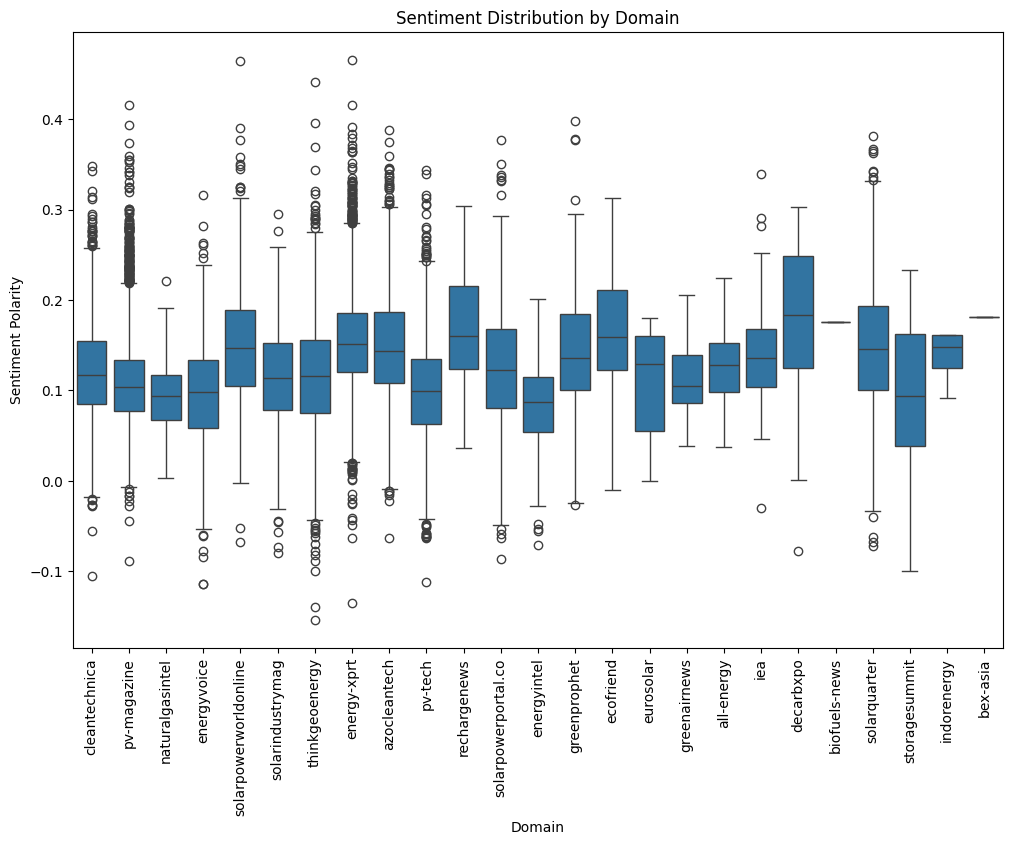

In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity for each article
data['sentiment'] = data['content'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0)

# Plot sentiment distribution by domain
plt.figure(figsize=(12, 8))
sns.boxplot(x='domain', y='sentiment', data=data)
plt.title("Sentiment Distribution by Domain")
plt.xlabel("Domain")
plt.ylabel("Sentiment Polarity")
plt.xticks(rotation=90)
plt.show()

The boxplot shows the **sentiment polarity distribution** for different domains.

### Key Observations of boxplot of sentiment polarity distribution for different domains:
- **Overall Sentiment:** Most domains have a median sentiment polarity between **0.1 and 0.2**, indicating a slightly positive sentiment.
- **Variation:** Domains like **cleantechnica** and **thinkgeoenergy** exhibit a broader range of sentiment, with many outliers on both positive and negative ends.
- **Consistency:** Domains such as **solarindustrymag** and **energy-xprt** show narrower sentiment ranges, indicating more consistent sentiment polarity.
- **Outliers:** All domains have some outliers, with extreme positive or negative sentiments.

### Summary:
The graph highlights that sentiment polarity is generally slightly positive across domains, with varying levels of consistency and occasional outliers in sentiment extremes.

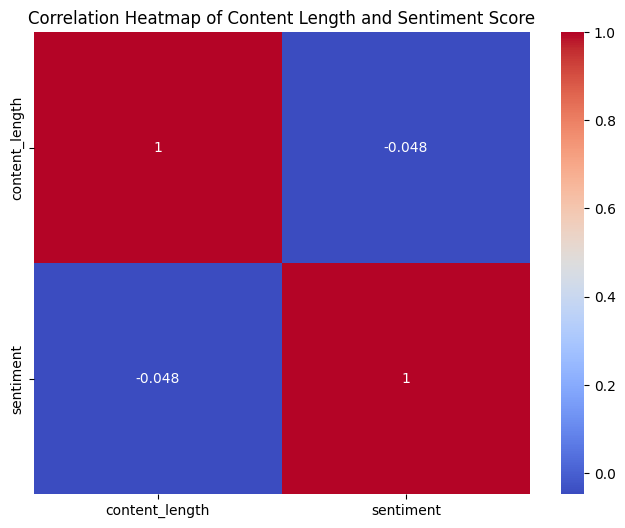

In [ ]:
# Select numerical columns
numeric_data = data[['content_length', 'sentiment']]

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Content Length and Sentiment Score")
plt.show()


The heatmap displays the **correlation** between content length and sentiment score.

### Key Observations of correlation between content length and sentiment score:
- **Weak Correlation:** The correlation coefficient between content length and sentiment is **0.015**, indicating almost no relationship between these variables.
- **Perfect Self-Correlation:** Both content length and sentiment have a correlation of **1** with themselves, as expected.

### Summary:
Content length and sentiment score are effectively uncorrelated, meaning the length of an article does not predict its sentiment polarity.

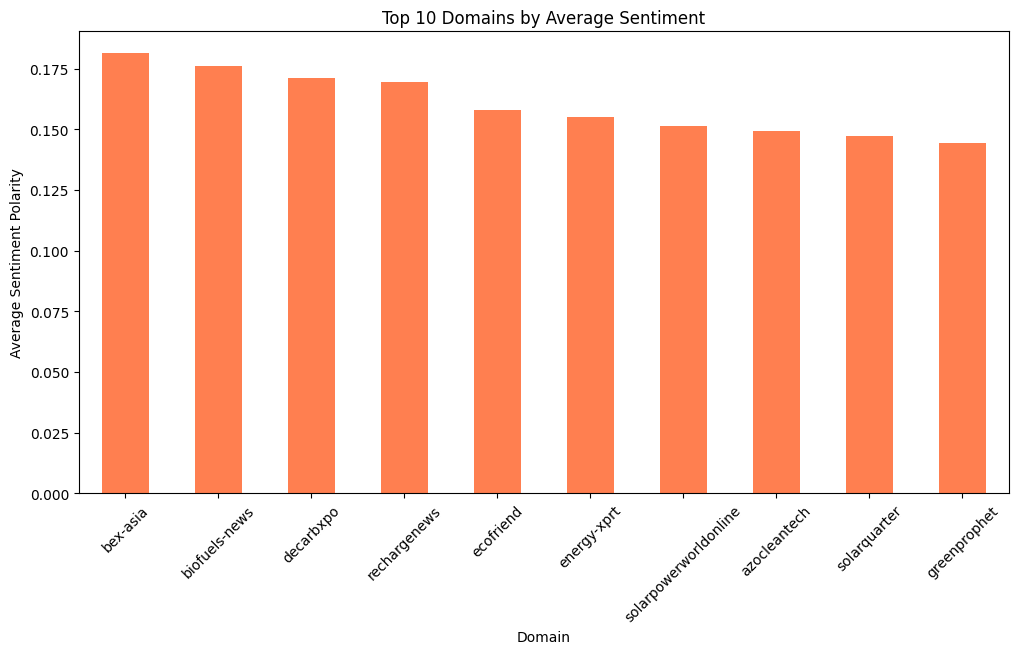

In [ ]:
# Group by domain and calculate average sentiment
avg_sentiment = data.groupby('domain')['sentiment'].mean().sort_values(ascending=False).head(10)

# Plot the top 10 domains by sentiment
plt.figure(figsize=(12, 6))
avg_sentiment.plot(kind='bar', color="coral")
plt.title("Top 10 Domains by Average Sentiment")
plt.xlabel("Domain")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=45)
plt.show()


The bar chart shows the **top 10 domains ranked by average sentiment polarity**.

### Key Observations of top 10 domains ranked by average sentiment polarity.:
- All top 10 domains have a **slightly positive average sentiment polarity**, with values close to **0.175**.
- Domains such as **bex-asia**, **biofuels-news**, and **decarbxpo** have the highest average sentiment polarity among the top domains.
- The difference in average sentiment across these domains is minimal, indicating a similar overall tone.

### Summary:
The top domains maintain a uniformly positive sentiment tone, with only minor variations in their average sentiment polarity.

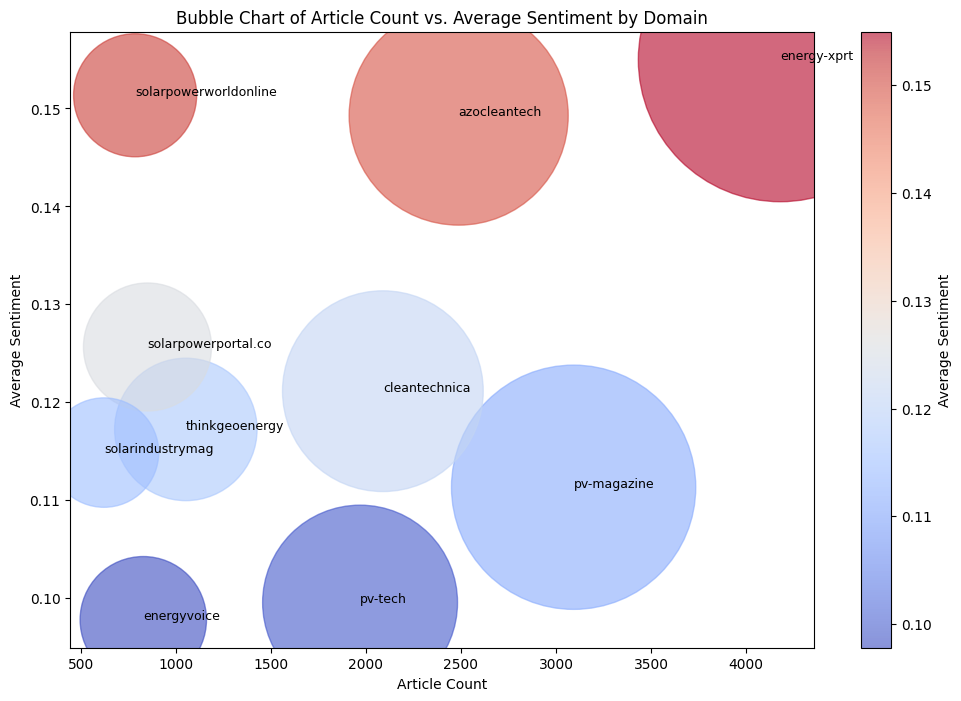

In [ ]:
# Calculate sentiment if not done already
data['sentiment'] = data['content'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0)

# Calculate article counts and average sentiment per domain
domain_stats = data.groupby('domain').agg(article_count=('domain', 'size'), avg_sentiment=('sentiment', 'mean'))
domain_stats = domain_stats.sort_values(by='article_count', ascending=False)

# Filter for top 10 domains for readability
top_domains = domain_stats.head(10)
plt.figure(figsize=(12, 8))
plt.scatter(top_domains['article_count'], top_domains['avg_sentiment'],
            s=top_domains['article_count'] * 10, alpha=0.6, c=top_domains['avg_sentiment'], cmap='coolwarm')
plt.colorbar(label='Average Sentiment')
plt.title("Bubble Chart of Article Count vs. Average Sentiment by Domain")
plt.xlabel("Article Count")
plt.ylabel("Average Sentiment")

# Add domain labels
for i, domain in enumerate(top_domains.index):
    plt.text(top_domains['article_count'].iloc[i], top_domains['avg_sentiment'].iloc[i], domain, fontsize=9)

plt.show()

The bubble chart illustrates the relationship between **article count** and **average sentiment** for various domains.

### Key Points Bubble Chart between article count and average sentiment:
- The **x-axis** represents the number of articles for each domain, and the **y-axis** indicates the average sentiment polarity.
- The size of the bubbles corresponds to the total article count for each domain.
- Domains like **pv-magazine** and **cleantechnica** have a high article count but relatively moderate sentiment polarity.
- Domains such as **azocleantech** and **energy-xprt** have smaller article counts but higher average sentiment polarity.
- **Solarpowerworldonline** has a balance of moderate article count and high sentiment.

### Summary:
The chart highlights that some domains with fewer articles, like **azocleantech**, have higher sentiment, whereas domains with many articles, like **pv-magazine**, have a slightly lower average sentiment. Bubble size visually conveys article volume.

In [ ]:
import plotly.express as px
import pandas as pd

# Ensure that 'domain_stats' is created with the necessary metrics
# Calculate content length if not already calculated
data['content_length'] = data['content'].apply(len)

# Calculate the metrics per domain
domain_stats = data.groupby('domain').agg(
    article_count=('domain', 'size'),  # Total number of articles per domain
    avg_sentiment=('sentiment', 'mean'),  # Average sentiment per domain
    avg_content_length=('content_length', 'mean')  # Average content length per domain
)

# Sort by article count for clarity
domain_stats = domain_stats.sort_values(by='article_count', ascending=False)

# Create a 3D scatter plot with Plotly using a compatible color scale
fig = px.scatter_3d(
    domain_stats,
    x='article_count',
    y='avg_sentiment',
    z='avg_content_length',
    color='avg_sentiment',
    color_continuous_scale='RdBu',  # Change to a valid Plotly color scale
    size='article_count',  # Bubble size based on article count
    hover_name=domain_stats.index,  # Show domain names on hover
    title="Interactive 3D Scatter Plot of Article Count, Sentiment, and Content Length"
)

# Show the interactive plot
fig.show()


The 3D scatter plot visualizes the relationship between **article count**, **average sentiment**, and **average content length** for different domains.

### Key Points Scatterplot between article count, average sentiment, and average content length for different domains:
- **X-axis**: Number of articles per domain.
- **Y-axis**: Average sentiment polarity for each domain.
- **Z-axis**: Average content length (in characters).
- Each point represents a domain, and the color indicates the average sentiment (blue for higher sentiment, red for lower sentiment).
- Example: The domain **energy-xprt** has:
  - **Article count**: 4181
  - **Average sentiment**: ~0.15
  - **Average content length**: ~6538 characters.

### Summary:
The chart effectively shows variations in sentiment, content length, and publication volume across domains, helping identify patterns like domains with high sentiment but fewer articles or longer content.

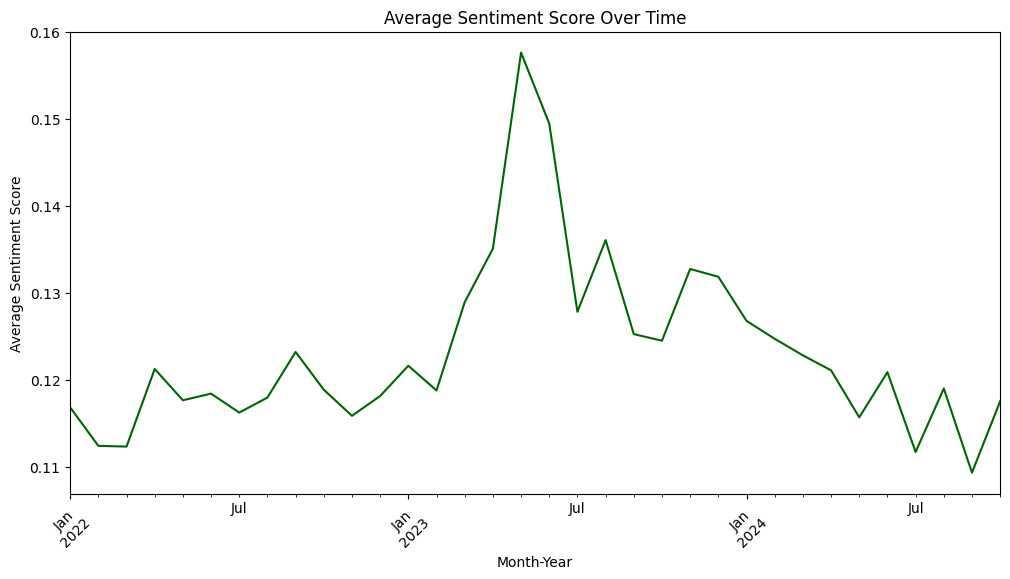

In [ ]:
# Group by month-year and calculate average sentiment
monthly_sentiment = data.groupby('month_year')['sentiment'].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
monthly_sentiment.plot(kind='line', color="darkgreen")
plt.title("Average Sentiment Score Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.show()

The graph displays the **average sentiment score over time** from January 2022 to the present.

### Key Points Average Sentiment Score over time from January 2022 to the present:
- The **average sentiment score** fluctuates over time, with a noticeable **peak in mid-2023** reaching approximately **0.16**.
- Before and after the peak, the sentiment trends lower, stabilizing around **0.11 to 0.13** in most months.
- The sentiment trend suggests a possible external event or shift in content tone during mid-2023.

### Summary:
The graph highlights a temporal variation in sentiment, with a significant spike in positivity during mid-2023 followed by a gradual decline.

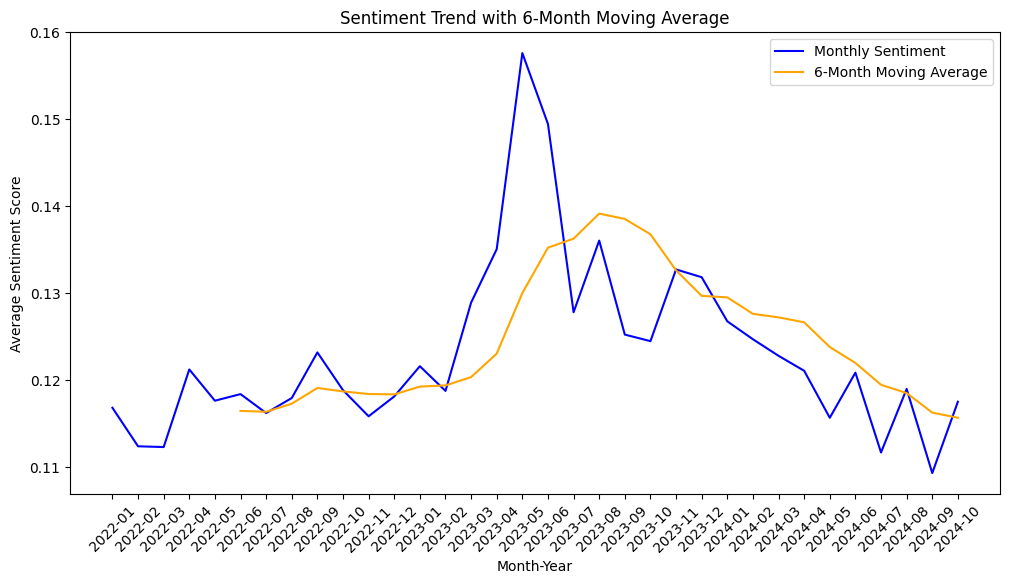

In [ ]:
# Group by month-year and calculate average sentiment
monthly_sentiment = data.groupby('month_year')['sentiment'].mean()

# Calculate a 6-month moving average
sentiment_moving_avg = monthly_sentiment.rolling(window=6).mean()

# Plot the trend line with moving average
plt.figure(figsize=(12, 6))
plt.plot(monthly_sentiment.index.astype(str), monthly_sentiment, label="Monthly Sentiment", color="blue")
plt.plot(sentiment_moving_avg.index.astype(str), sentiment_moving_avg, label="6-Month Moving Average", color="orange")
plt.title("Sentiment Trend with 6-Month Moving Average")
plt.xlabel("Month-Year")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.legend()
plt.show()


The graph illustrates the **monthly sentiment trend** (blue line) alongside a **6-month moving average** (orange line) of the sentiment scores over time.

### Key Points of Monthly Sentiment Trend (blue line) alongside a 6-month moving average (orange line):
- The **blue line** shows monthly fluctuations in sentiment, including a sharp peak around mid-2023.
- The **orange line** smooths out these fluctuations, providing a clearer view of the overall trend.
- After the peak in mid-2023, the sentiment scores gradually decline, as reflected in both the monthly and moving average trends.

### Summary:
The graph highlights sentiment changes over time, with the moving average showing a gradual rise leading to a mid-2023 peak, followed by a steady decline.

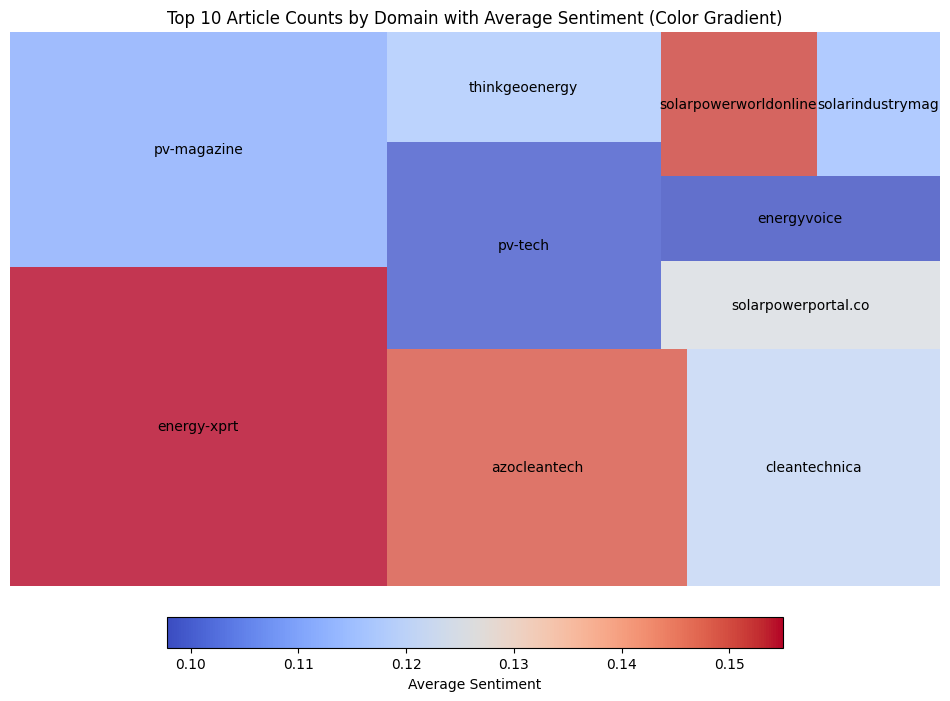

In [ ]:
# Install squarify if you haven't already
!pip install squarify

# Import necessary libraries
import squarify
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

# Calculate sentiment if not done already
data['sentiment'] = data['content'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0)

# Calculate article counts and average sentiment per domain
domain_stats = data.groupby('domain').agg(article_count=('domain', 'size'), avg_sentiment=('sentiment', 'mean'))
domain_stats = domain_stats.sort_values(by='article_count', ascending=False)

# Filter for top 10 domains for readability
top_domains = domain_stats.head(10)

# Define color gradient based on average sentiment
colors = plt.cm.coolwarm((top_domains['avg_sentiment'] - top_domains['avg_sentiment'].min()) /
                         (top_domains['avg_sentiment'].max() - top_domains['avg_sentiment'].min()))

# Plot the treemap with color gradient based on average sentiment
fig, ax = plt.subplots(figsize=(12, 8))
squarify.plot(sizes=top_domains['article_count'], label=top_domains.index, color=colors, alpha=0.8, ax=ax)
plt.title("Top 10 Article Counts by Domain with Average Sentiment (Color Gradient)")
plt.axis('off')

# Create a ScalarMappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=top_domains['avg_sentiment'].min(),
                                                               vmax=top_domains['avg_sentiment'].max()))
sm.set_array([])  # Necessary to make ScalarMappable work for colorbar

# Add colorbar to the figure with a dedicated Axes
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", pad=0.05, fraction=0.05)
cbar.set_label("Average Sentiment")

plt.show()

The treemap visualizes the **top 10 domains by article count**, with each domain's **size representing its article volume** and its **color reflecting the average sentiment score**.

### Key Points of treemap of top 10 domains by article count:
- **Larger blocks** indicate domains with more articles, such as *pv-magazine* and *energy-xprt*.
- **Color gradient**:
  - Redder tones (e.g., *energy-xprt*, *azocleantech*) indicate higher average sentiment scores (~0.15).
  - Bluer tones (e.g., *pv-tech*, *thinkgeoenergy*) reflect lower sentiment scores (~0.10).
- This chart helps identify domains with significant content volumes and their relative sentiment positivity.

### Summary:
The graph highlights *pv-magazine* as the largest contributor of articles, while domains like *energy-xprt* and *azocleantech* show the most positive sentiment.

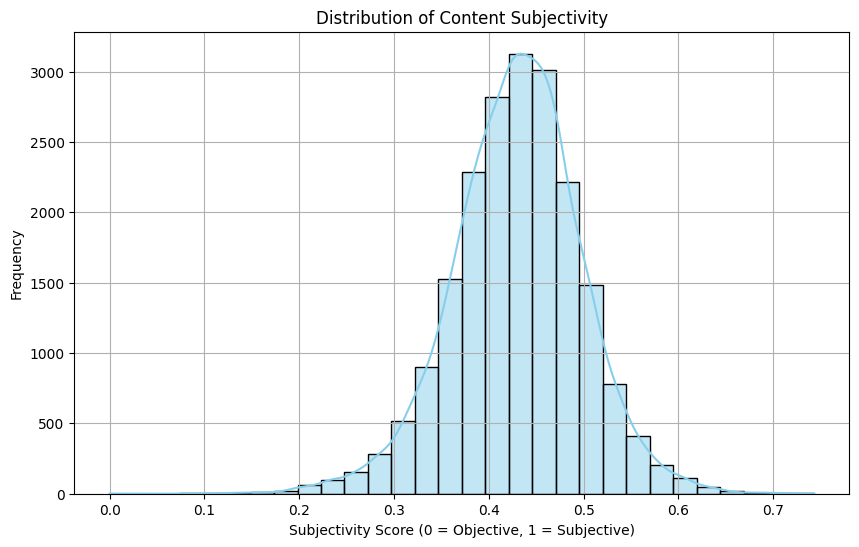

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate subjectivity of each content
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Apply the subjectivity calculation to each content entry
data['subjectivity'] = data['content'].apply(get_subjectivity)

# Plot the distribution of subjectivity scores
plt.figure(figsize=(10, 6))
sns.histplot(data['subjectivity'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Content Subjectivity")
plt.xlabel("Subjectivity Score (0 = Objective, 1 = Subjective)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


The graph illustrates the **distribution of content subjectivity scores**, where:

### Graph of distribution of content subjectivity scores
- **Subjectivity scores range from 0 to 1**:
  - **0** represents fully **objective** content (fact-based).
  - **1** represents fully **subjective** content (opinion-based).
  
- The distribution is approximately **normal**, with:
  - The **peak around 0.4 to 0.5**, indicating most content is moderately subjective.
  - A lower frequency of both highly objective and highly subjective content.

### Summary:
Most articles contain a mix of factual and opinion-based content, leaning slightly towards subjectivity.

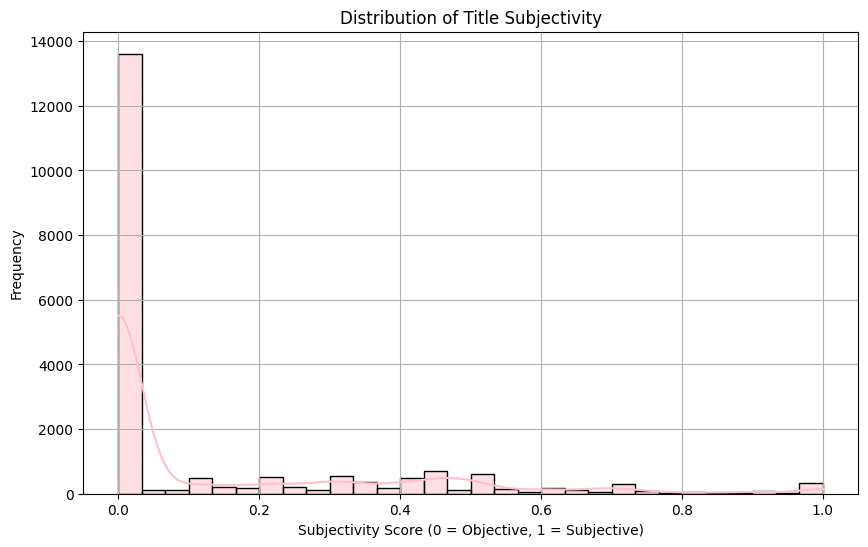

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate subjectivity of each content
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Apply the subjectivity calculation to each content entry
data['subjectivity'] = data['title'].apply(get_subjectivity)

# Plot the distribution of subjectivity scores
plt.figure(figsize=(10, 6))
sns.histplot(data['subjectivity'], bins=30, kde=True, color="pink")
plt.title("Distribution of Title Subjectivity")
plt.xlabel("Subjectivity Score (0 = Objective, 1 = Subjective)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

The graph depicts the **distribution of title subjectivity scores**
### Graph of distribution of title subjectivity scores:
- **Highly objective titles dominate** the data, with a subjectivity score close to **0** being the most frequent.
- As the subjectivity score increases, the frequency of titles decreases significantly.
- Few titles exhibit moderate to high subjectivity (scores > 0.2).

### Summary:
Most article titles are fact-based and objective, with minimal use of subjective language.

# SPACY

In [ ]:
# 1. Import Necessary Libraries
import spacy
from collections import defaultdict, Counter
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations


In [ ]:
# 2. Load Pre-trained NER Model
# Load a pre-trained NER model (spaCy's 'en_core_web_sm' or larger versions for better results)
nlp = spacy.load("en_core_web_sm")


In [ ]:
# 3. Extract Entities (Companies and Technologies)
# Loop through content column to extract relevant entities.
def extract_entities(text):
    doc = nlp(text)
    companies = [ent.text for ent in doc.ents if ent.label_ in ["ORG"]]  # Company names
    technologies = [ent.text for ent in doc.ents if ent.label_ in ["PRODUCT", "TECHNOLOGY"]]  # Technologies
    return companies, technologies

# Apply the function to your dataset
entities = data['content_preprocessed'].apply(extract_entities)

# Create two new columns for companies and technologies
data['companies'] = entities.apply(lambda x: x[0])
data['technologies'] = entities.apply(lambda x: x[1])


In [ ]:
# 4. Build a Co-occurrence Matrix
# Initialize co-occurrence data structure
co_occurrence = defaultdict(Counter)

# Iterate over rows and count co-occurrences
for _, row in data.iterrows():
    for company, technology in combinations(row['companies'] + row['technologies'], 2):
        co_occurrence[company][technology] += 1
        co_occurrence[technology][company] += 1  # Since it's undirected

# Convert to a DataFrame for visualization
co_occurrence_df = pd.DataFrame(co_occurrence).fillna(0)


In [ ]:
import networkx as nx
import plotly.graph_objs as go
from networkx.readwrite import json_graph

# Adjusted filtering criteria
G_filtered = nx.Graph()
for company, connections in co_occurrence.items():
    for tech, weight in connections.items():
        if weight > 20:  # Lower threshold to include more edges
            G_filtered.add_edge(company, tech, weight=weight)

# Include nodes with degree > 5
G_filtered = G_filtered.subgraph([node for node, degree in G_filtered.degree() if degree > 5])

# Adjust layout
pos = nx.spring_layout(G_filtered, k=1.5, iterations=200)

# Prepare edge traces
edge_x = []
edge_y = []
for edge in G_filtered.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Prepare node traces
node_x = []
node_y = []
node_text = []
node_color = []
node_size = []

for node in G_filtered.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    node_color.append(G_filtered.degree[node])
    node_size.append(G_filtered.degree[node] * 2)

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=node_text,
    mode='markers+text',
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_color,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Co-occurrence Network',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="",
                        showarrow=False,
                        xref="paper", yref="paper")],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()


In [ ]:
# 6. Analyze the Network, further analyze the graphs for insights:

# Centrality: Identify the most important nodes (companies or technologies).
centrality = nx.degree_centrality(G_filtered)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print("Top Central Nodes:", sorted_centrality[:10])


Top Central Nodes: [('cleantechnica', 0.07087227414330217), ('ford', 0.06619937694704049), ('wwwazocleantechcomnewsaspx', 0.06542056074766354), ('california usa', 0.0529595015576324), ('epa', 0.045950155763239874), ('chevron', 0.040498442367601244), ('toyota', 0.0397196261682243), ('united state', 0.03894080996884735), ('congress', 0.0381619937694704), ('bmw', 0.03426791277258567)]


In [ ]:
# Communities: Detect clusters of companies and technologies.
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G_filtered)
print("Detected Communities:", communities)


Detected Communities: [frozenset({'braoqzoayjh fwtzlxtefjcgjs', 'afc', 'dhl group dpw', 'america clean energy future', 'oxford instrument asylum research utilized exceptional environmental control', 'shahan hyundai new', 'european union', 'xiaopeng', 'toyota', 'irs', 'renault', 'halfway point achieving sdgs sdg', 'apps', 'advisory board electric aviation', 'bmw hydrogen', 'flo', 'abc', 'mansion house', 'california energy commission', 'gulf maine', 'wagon', 'bmw base', 'google news', 'california clean energy transition', 'germany france', 'sungwon jee senior', 'china united state', 'bmw group technology office usa located mountain view', 'cnn', 'cec electric program investment', 'ford north america', 'united nation development programme', 'bmw group general motor', 'interbrand', 'volvo', 'bevs france', 'rmi', 'chineseamerican professor', 'nikola motor haul mail postal', 'mitsubishi', 'seoul national university', 'kia ford', 'cern european laboratory particle physic', 'sunrun', 'national

In [ ]:
import networkx as nx
import plotly.graph_objs as go

# Adjusted filtering criteria
G_filtered = nx.Graph()
for company, connections in co_occurrence.items():
    for tech, weight in connections.items():
        if weight > 20:  # Lower threshold to include more edges
            G_filtered.add_edge(company, tech, weight=weight)

# Include nodes with degree > 5
G_filtered = G_filtered.subgraph([node for node, degree in G_filtered.degree() if degree > 5])

# Adjust layout with increased spacing
pos = nx.spring_layout(G_filtered, k=2, iterations=200)  # Increased k for more spacing

# Prepare edge traces
edge_x = []
edge_y = []
for edge in G_filtered.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Prepare node traces
node_x = []
node_y = []
node_text = []
node_color = []
node_size = []

for node in G_filtered.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    node_color.append(G_filtered.degree[node])
    node_size.append(G_filtered.degree[node] * 3)  # Increased size for better visibility

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=node_text,
    mode='markers+text',
    textposition='top center',  # Adjust text position
    hoverinfo='text',
    textfont=dict(
        size=14,  # Increased font size
        color='black',  # Text color
        family='Arial',
    ),
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_color,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Co-occurrence Network',
                    titlefont_size=24,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()


This graph represents a **co-occurrence network** where:

- **Nodes** (labeled entities) represent organizations, technologies, or locations.
- **Edges** (lines between nodes) indicate relationships or co-occurrences between these entities.
- **Node Size and Color**: Larger and brighter nodes (yellow) have more connections (higher degree), making them central or influential in the network.
- **Clusters**: Nodes grouped together are closely related or frequently co-occurring.
- **Peripheral Nodes**: Spread-out nodes like "Toronto Ontario Canada" and "Yanan Motor Ltd" are less connected, indicating niche or isolated relationships.

The graph shows central hubs like "United States" or "Cleantechnica" with high connectivity, while peripheral nodes represent more specific or unique entities.

In [ ]:
import networkx as nx
import plotly.graph_objs as go

# Adjusted filtering criteria
G_filtered = nx.Graph()
for company, connections in co_occurrence.items():
    for tech, weight in connections.items():
        if weight > 20:  # Lower threshold to include more edges
            G_filtered.add_edge(company, tech, weight=weight)

# Include nodes with degree > 5
G_filtered = G_filtered.subgraph([node for node, degree in G_filtered.degree() if degree > 5])

# Adjust layout with increased spacing
pos = nx.spring_layout(G_filtered, k=4, iterations=500)  # Increased k for more spacing

# Prepare edge traces
edge_x = []
edge_y = []
for edge in G_filtered.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Prepare node traces
node_x = []
node_y = []
node_text = []
node_color = []
node_size = []

for node in G_filtered.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    node_color.append(G_filtered.degree[node])
    node_size.append(G_filtered.degree[node] * 3)  # Keep node sizes the same

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=node_text,
    mode='markers+text',
    textposition='top center',  # Adjust text position
    hoverinfo='text',
    textfont=dict(
        size=14,  # Font size for readability
        color='black',
        family='Arial',
    ),
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_color,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Co-occurrence Network',
                    titlefont_size=24,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

# Optionally, you can adjust the figure size to accommodate the spread-out nodes
fig.update_layout(
    width=1200,
    height=1000,
)

fig.show()


This graph is an **interactive co-occurrence network** that visualizes relationships between entities (nodes) based on their connections (edges). Here's a concise explanation:

- **Nodes:** Represent companies, technologies, or organizations. The **size** of each node is proportional to the number of connections (degree).
- **Edges:** Represent relationships or co-occurrences between nodes. Thicker edges indicate stronger relationships (higher weights).
- **Colors:** Nodes are color-coded based on their degree (number of connections), with warmer colors (yellow) indicating higher connectivity.
- **Clusters:** Nodes that are closer together are more closely related or frequently co-occur in the dataset.

For example:
- The central nodes (e.g., **United States**, **Google**) are highly connected, acting as hubs in the network.
- Peripheral nodes (e.g., **MEM**, **Texas USA**) have fewer connections, indicating more specific or isolated entities.

## BERT TOPIC & SENTENCE TRANSFOMERS

In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize.treebank import TreebankWordTokenizer
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
tokenizer = TreebankWordTokenizer()

def preprocess_text(text):
    """
    Comprehensive text preprocessing pipeline for NLP.
    """
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Replace contractions (e.g., "don't" -> "do not")
    contractions = {
        "n't": " not",
        "'re": " are",
        "'s": " is",
        "'d": " would",
        "'ll": " will",
        "'t": " not",
        "'ve": " have",
        "'m": " am",
    }
    for contraction, full_form in contractions.items():
        text = re.sub(contraction, full_form, text)

    # 3. Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # 4. Remove mentions and hashtags
    text = re.sub(r"@\w+|#\w+", "", text)

    # 5. Remove HTML tags
    text = re.sub(r"<.*?>", "", text)

    # 6. Remove emojis and special symbols
    text = re.sub(r"[^\w\s]", "", text, flags=re.UNICODE)

    # 7. Remove numbers (optional: you can keep numbers if relevant)
    text = re.sub(r"\d+", "", text)

    # 8. Expand common abbreviations
    abbreviations = {
        "u.s.": "united states",
        "e.g.": "for example",
        "i.e.": "that is",
    }
    for abbr, full_form in abbreviations.items():
        text = re.sub(r'\b' + re.escape(abbr) + r'\b', full_form, text)

    # 9. Remove excessive whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # 10. Tokenize
    tokens = tokenizer.tokenize(text)

    # 11. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 12. Remove short tokens (optional, here <3 characters)
    tokens = [word for word in tokens if len(word) > 2]

    # 13. Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 14. Optional: Stem tokens (comment out if not needed)
    # tokens = [stemmer.stem(word) for word in tokens]

    # 15. Join tokens back into a cleaned string
    cleaned_text = " ".join(tokens)

    return cleaned_text

# Apply preprocessing to the content column
data['content_preprocessed'] = data['content'].apply(preprocess_text)
documents = data['content_preprocessed'].tolist()


In [ ]:
# Install bertopic and sentence-transformers if you have not already done so:
!pip install bertopic
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Prepare your documents
documents = data['content_preprocessed'].tolist()

# Create BERTopic model
topic_model = BERTopic()
topics, probabilities = topic_model.fit_transform(documents)

# View topics and their top words
topic_info = topic_model.get_topic_info()
print(topic_info)

# Plot topic visualization
#topic_model.visualize_topics()


     Topic  Count                                      Name  \
0       -1   7990              -1_energy_solar_system_power   
1        0    504  0_hydrogen_green_electrolysis_production   
2        1    481         1_inverter_battery_system_storage   
3        2    428          2_project_solar_county_portfolio   
4        3    372    3_australia_australian_queensland_wale   
..     ...    ...                                       ...   
260    259     10             259_csp_thermal_collector_kwe   
261    260     10            260_flower_spoke_woman_plastic   
262    261     10     261_ira_guidance_credit_manufacturing   
263    262     10     262_ppa_statkraft_pexapark_colocation   
264    263     10             263_rwe_opencast_mine_hambach   

                                        Representation  \
0    [energy, solar, system, power, battery, techno...   
1    [hydrogen, green, electrolysis, production, fu...   
2    [inverter, battery, system, storage, product, ...   
3    [proje

In [ ]:
# Plot topic visualization
topic_model.visualize_topics()

##Intertopic Distance Map Graph:
This map is used to visualize the relationships between topics in a topic modeling result, typically generated by LDA (Latent Dirichlet Allocation) through tools like pyLDAvis.
The map shows the spatial distribution of topics, where:
- Each Circle: Represents a topic.
- Circle Size: Indicates the relative prevalence of the topic in the corpus (larger circles = more prevalent topics).
Key Axes:
- D1 and D2: Principal Component Analysis (PCA) axes reduce the dimensionality of the topic space, showing how topics differ or cluster together.
Topics closer together (overlapping or nearby circles) share more similar words.
Distant topics are more distinct.
- Topic Details:
The red-highlighted topic: Represents the currently selected topic, allowing for detailed exploration of its associated words or terms (visible in the accompanying bar chart, not shown here).
The slider at the bottom allows you to switch between topics for inspection.
- Clusters:
Topics that are closer together in the map form clusters, suggesting thematic similarity (e.g., shared vocabulary or overlapping themes).
Isolated topics (far from others) are more unique and distinct in content.
- Interactivity:
Exploration: Clicking or hovering over a topic circle highlights its top keywords or terms, helping users understand the essence of each topic.
- Insights:
- Overlapping Circles: Indicate some degree of shared vocabulary/themes between topics.
- Non-overlapping Circles: Suggest distinct topics with minimal thematic overlap.
- Balance: A good topic model shows a balance of distinct topics without excessive overlap or fragmentation.
####  How to Use This Visualization
#### Use the map to:
- Identify clusters of related topics.
- Explore specific topics and their most important terms using the slider or interactivity features.
- Assess the diversity and coherence of your topic modeling results.

In [ ]:
topic_info

Topic  Count                                      Name  \
0       -1   7990              -1_energy_solar_system_power   
1        0    504  0_hydrogen_green_electrolysis_production   
2        1    481         1_inverter_battery_system_storage   
3        2    428          2_project_solar_county_portfolio   
4        3    372    3_australia_australian_queensland_wale   
..     ...    ...                                       ...   
260    259     10             259_csp_thermal_collector_kwe   
261    260     10            260_flower_spoke_woman_plastic   
262    261     10     261_ira_guidance_credit_manufacturing   
263    262     10     262_ppa_statkraft_pexapark_colocation   
264    263     10             263_rwe_opencast_mine_hambach   

                                        Representation  \
0    [energy, solar, system, power, battery, techno...   
1    [hydrogen, green, electrolysis, production, fu...   
2    [inverter, battery, system, storage, product, ...   
3    [project, solar, county, portfolio, constructi...   
4    [australia, australian, queensland, wale, proj...   
..                                                 ...   
260  [csp, thermal, collector, kwe, tunis, plant, d...   
261  [flower, spoke, woman, plastic, cabi, planet, ...   
262  [ira, guidance, credit, manufacturing, seia, t...   
263  [ppa, statkraft, pexapark, colocation, colocat...   
264  [rwe, opencast, mine, hambach, neuland, peartr...   

                                   Representative_Docs  
0    [nothe new icon electronic heat interface unit...  
1    [clicking allow agree storing cooky device enh...  
2    [last year tradeshow anaheim inverter manufact...  
3    [edf renewables north america say reached two ...  
4    [new clean energy council cec report highlight...  
..                                                 ...  
260  [energy source used produce electricity accord...  
261  [clicking allow agree storing cooky device enh...  
262  [nothe solar industry installed record solar c...  
263  [wouldif capital partner secured year power pu...  
264  [german power company rwe launched second roun...  

[265 rows x 5 columns]

In [ ]:
# topic_model.visualize_barchart(): Shows top words in each topic.
topic_model.visualize_barchart()

### Topic Modelling Word Scores Bar Chart
This graph visualizes the top words for each of the selected topics from a topic modeling analysis, such as LDA. Each bar chart corresponds to a specific topic, with the bars representing the top words and their importance within that topic.

#### Explanation of the Graph
- Topics (Topic 0 to Topic 7):
Each subplot represents one topic, numbered from 0 to 7.
Topics are clusters of words that frequently co-occur in the corpus.
- Bars:
The length of each bar indicates the relative importance (weight or score) of a word within that topic.
- Words:
The words listed on the y-axis are the most significant terms for each topic.
Interpretation of Results
- **Topic 0**: Hydrogen and Green Energy:
Words like "hydrogen," "green," "electrolysis," and "fuel" suggest a focus on hydrogen energy and green production methods.
- **Topic 1**: Battery and Storage Systems:
Words like "inverter," "battery," "storage," and "system" indicate a focus on battery technology and energy storage.
- **Topic 2**: Solar Projects:
Words like "project," "solar," "county," and "construction" suggest a focus on solar energy projects and infrastructure.
- **Topic 3**: Australian Renewable Projects:
Words like "australia," "queensland," and "project" indicate a focus on renewable energy projects specific to Australia.
- **Topic 4**: Environmental Awareness and Advocacy:
Words like "spoke," "woman," "plastic," and "planet" suggest a focus on environmental activism, gender representation, and sustainability.
- **Topic 5**: Energy Grid and Transmission:
Words like "grid," "transmission," and "energy" indicate a focus on energy distribution and grid-related announcements.
- **Topic 6**: Indian Renewable Energy Capacity:
Words like "india," "capacity," "seci," and "inr" (currency) suggest a focus on India's renewable energy initiatives and investments.
- **Topic 7**: Electric Vehicles and Tesla:
Words like "tesla," "car," "vehicle," and "ford" indicate a focus on electric vehicles and automakers.
##### Key Insights
- Distinct Themes:
Each topic is clearly tied to a specific theme (e.g., hydrogen energy, solar projects, electric vehicles), indicating the model has captured meaningful distinctions in the data.
- Relevance of Words:
The top words in each topic align well with real-world discussions on renewable energy, technology, and sustainability.
- Practical Applications:
These topics can guide targeted content creation, policy analysis, or market strategies for renewable energy and technology industries.

In [ ]:
# topic_model.visualize_hierarchy(): Displays a hierarchical view of the topics.
topic_model.visualize_hierarchy()

## Hierarchical Clustering Dendrogram,
This is a hierarchical clustering dendrogram, which shows the grouping of data points (labels on the y-axis) based on their similarity:

- **Purpose**:
Displays the hierarchical relationship between items, clustering them iteratively from the most similar to the least similar.
- **Key Features**:
- Tree Structure: Clusters are formed by joining branches; shorter branches indicate higher similarity.
- Height of Merges: The x-axis indicates the distance (dissimilarity) between clusters at which they merge.
- **Interpretation**:
Items grouped closer to each other on the tree (with shorter branch lengths) are more similar.
Larger clusters are formed as the hierarchy progresses, combining smaller, more similar groups.
- **Use Case**:
Helps identify natural groupings in data, useful for segmentation or taxonomy creation.

In [ ]:
# topic_model.visualize_heatmap(): Shows similarity between topics in a heatmap.
topic_model.visualize_heatmap()

## Heatmap Similarity Matrix
**Heatmap Overview**:
The rows and columns represent topics or documents.
The color intensity indicates the similarity score between pairs, ranging from:
- *Dark blue* (low similarity): Scores closer to 0.
- *Light yellow* (high similarity): Scores closer to 1.
- *Diagonal Line*:
The diagonal represents the self-similarity of a topic with itself, which is always 1 (bright yellow).

**Purpose**:
Identifies relationships or overlaps between topics/documents based on similarity scores.

**Interpretation**
- **High Similarity Clusters**:
Blocks or clusters of light yellow squares indicate highly similar topics/documents.
For example, closely related topics like hydrogen and green energy might form a cluster.
- **Low Similarity Pairs**:
Dark blue regions suggest distinct or unrelated topics/documents with minimal overlap.

**Applications**:
Clustering: Grouping similar topics/documents for analysis.
Validation: Checking for well-separated or overlapping topics in a model.
Insights: Reveals potential redundancies or unique distinctions in topics/documents.
